# Problem Statement

Develop a predictive model to identify and classify fraudulent transactions based on a dataset containing various features related to transaction details. The objective is to build a robust machine learning model that can accurately predict and classify transactions as fraudulent or non-fraudulent based on the provided features. The model should be capable of generalizing well to new, unseen data and should be evaluated using appropriate performance metrics such as precision, recall, F1 score, and area under the receiver operating characteristic curve (AUC-ROC).

# Description about the data

1.TransactionKey: Unique identifier for each transaction.

2.ConnectionRegion: Region or location associated with the connection.

3.V1CF to V6CF: Various transaction-specific features.

4.TimeZone: Time zone associated with the transaction.

5.AreaCode: Area code related to the transaction.

6.ConnectionOrg: Organization associated with the connection.

7.ConnectionType: Type of connection used for the transaction.

8.ConnectionSpeed: Speed of the connection used for the transaction.

9.channel: Channel through which the transaction occurred.

10.TransactionDateTime: Date and time of the transaction.

11.AddressUpdateDate: Date of the last address update.

12.EmailUpdateDate: Date of the last email update.

13.webSessOS: Operating system used during the web session.

14.webSessWebBrowser: Web browser used during the web session.

15.LastLong and LastLat: Longitude and latitude of the last recorded location.

16.CurrentLong and CurrentLat: Current longitude and latitude of the transaction.

17.IsOldDevice: Binary indicator of whether the device is old.

18.WebSessionRetail: Retail-related information from the web session.

19.MainEntityUse: Main entity or purpose associated with the transaction.

20.Fraud: Binary variable indicating whether the transaction is fraudulent (target variable).

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive//my bank

/gdrive/My Drive/my bank


# Import libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
warnings.filterwarnings('ignore')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [ ]:
df=pd.read_csv("MyBank.csv")

In [ ]:
df.head()

TransactionKey            ConnectionRegion  V1CF  V2CF  V3CF  V4CF   V5CF  \
0           16758      south central@texas@us    99    98    10   803  19820   
1            8912       northeast@new york@us    99    94    61   602  16980   
2           92186  mid atlantic@new jersey@us    76    95    66   505  35620   
3           12924   south central@arkansas@us    99    23    50     0  35620   
4          125650  mid atlantic@new jersey@us    99    74    80   602  19100   

   TimeZone  AreaCode               ConnectionOrg  ...  webSessOS  \
0      -5.0     602.0  013 netvision fix ip users  ...   Mac OS X   
1      -4.0     512.0  013 netvision fix ip users  ...  Windows 7   
2      -6.0     407.0  013 netvision fix ip users  ...  Windows 7   
3      -5.0     202.0  013 netvision fix ip users  ...  Windows 7   
4      -8.0     313.0  013 netvision fix ip users  ...  Windows 7   

  webSessWebBrowser  LastLong  LastLat CurrentLong CurrentLat IsOldDevice  \
0            Chrome -108.5530      NaN      9.4400        NaN         0.0   
1              Edge -121.8382  27.9860   -112.0826    33.7985         0.0   
2     Mobile Safari  -74.0734  33.7985    -80.3120    32.8494         1.0   
3     Mobile Safari  -88.1029  27.9860    -84.3883    42.1530         1.0   
4            Chrome  -58.5244  34.9497   -111.3270    34.0476         1.0   

  WebSessionRetail MainEntityUse  Fraud  
0              0.0           NaN      0  
1              0.0         315.0      0  
2              NaN         333.0      0  
3              0.0         327.0      0  
4              0.0         394.0      0  

[5 rows x 27 columns]

In [ ]:
df.tail()

TransactionKey         ConnectionRegion  V1CF  V2CF  V3CF  V4CF  \
138747            4918  southwest@california@us    86    85    80   602   
138748          117775     southeast@georgia@us    99    97    90   527   
138749           70441      great lakes@ohio@us    99    88    90   618   
138750          127115  great lakes@illinois@us    99    23    23   819   
138751           40331     southeast@georgia@us    99    63    50   501   

         V5CF  TimeZone  AreaCode ConnectionOrg  ...  webSessOS  \
138747      0      -6.0     630.0   zynga corp.  ...        iOS   
138748  41860      -8.0     630.0   zynga corp.  ...   Mac OS X   
138749  12420      -5.0     212.0   zynga corp.  ...   Mac OS X   
138750  16980      -6.0     704.0   zynga corp.  ...  Windows 7   
138751  19100      -5.0     305.0   zynga corp.  ...  Windows 7   

       webSessWebBrowser  LastLong  LastLat CurrentLong CurrentLat  \
138747            Chrome  -66.9200  40.7589   -119.1831    34.0526   
138748            Chrome  -89.9481  40.7589    -74.1945    40.7387   
138749            Chrome  -81.2526  40.9526    -77.2718    40.7589   
138750            Chrome  -73.7644  42.3976   -117.7899    41.8488   
138751     Mobile Safari -104.9856  33.9535    -82.9995    33.7985   

       IsOldDevice WebSessionRetail MainEntityUse  Fraud  
138747         1.0              0.0         406.0      0  
138748         1.0              0.0         360.0      0  
138749         1.0              0.0         240.0      0  
138750         NaN              0.0         395.0      0  
138751         1.0              0.0         293.0      0  

[5 rows x 27 columns]

In [ ]:
df.shape

(138752, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionKey       138752 non-null  int64  
 1   ConnectionRegion     138752 non-null  object 
 2   V1CF                 138752 non-null  int64  
 3   V2CF                 138752 non-null  int64  
 4   V3CF                 138752 non-null  int64  
 5   V4CF                 138752 non-null  int64  
 6   V5CF                 138752 non-null  int64  
 7   TimeZone             138752 non-null  float64
 8   AreaCode             138740 non-null  float64
 9   ConnectionOrg        138752 non-null  object 
 10  ConnectionType       138752 non-null  object 
 11  ConnectionSpeed      138752 non-null  object 
 12  V6CF                 138752 non-null  object 
 13  channel              138752 non-null  object 
 14  TransactionDateTime  138752 non-null  object 
 15  AddressUpdateDate

Observations : There are 138752 rows and 27 columns. There are 16 numerical variable and 11 object variable

#Checking the null values

In [ ]:
df.isna().sum()

TransactionKey             0
ConnectionRegion           0
V1CF                       0
V2CF                       0
V3CF                       0
V4CF                       0
V5CF                       0
TimeZone                   0
AreaCode                  12
ConnectionOrg              0
ConnectionType             0
ConnectionSpeed            0
V6CF                       0
channel                    0
TransactionDateTime        0
AddressUpdateDate          0
EmailUpdateDate            0
webSessOS                  0
webSessWebBrowser          0
LastLong               24389
LastLat                24231
CurrentLong                0
CurrentLat             24379
IsOldDevice             4070
WebSessionRetail        4038
MainEntityUse           4080
Fraud                      0
dtype: int64

# Checking the unique values

In [ ]:
df.nunique()

TransactionKey         138752
ConnectionRegion          500
V1CF                        9
V2CF                       29
V3CF                       23
V4CF                      207
V5CF                      582
TimeZone                   27
AreaCode                  243
ConnectionOrg            7620
ConnectionType             11
ConnectionSpeed             4
V6CF                      231
channel                     4
TransactionDateTime     82445
AddressUpdateDate       66794
EmailUpdateDate         66917
webSessOS                  20
webSessWebBrowser          23
LastLong                 3160
LastLat                  3117
CurrentLong              3603
CurrentLat               3073
IsOldDevice                 2
WebSessionRetail            1
MainEntityUse             579
Fraud                       2
dtype: int64

# Statistical Summary

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T # The transpose (T) is used to switch rows and columns for better readability.

count unique                             top   freq  \
TransactionKey      138752.000    NaN                             NaN    NaN   
ConnectionRegion        138752    500         southwest@california@us  26098   
V1CF                138752.000    NaN                             NaN    NaN   
V2CF                138752.000    NaN                             NaN    NaN   
V3CF                138752.000    NaN                             NaN    NaN   
V4CF                138752.000    NaN                             NaN    NaN   
V5CF                138752.000    NaN                             NaN    NaN   
TimeZone            138752.000    NaN                             NaN    NaN   
AreaCode            138740.000    NaN                             NaN    NaN   
ConnectionOrg           138752   7620  time warner cable internet llc  15676   
ConnectionType          138752     11                           cable  70047   
ConnectionSpeed         138752      4                          medium  92827   
V6CF                    138752    231                             net  74018   
channel                 138752      4                             SOA  71956   
TransactionDateTime     138752  82445         31/05/2013 12:21:33:000     11   
AddressUpdateDate       138752  66794         20/01/2004 03:26:16:000   9820   
EmailUpdateDate         138752  66917         20/01/2004 02:45:44:000   6289   
webSessOS               138752     20                      Windows 10  36042   
webSessWebBrowser       138752     23                          Chrome  64624   
LastLong            114363.000    NaN                             NaN    NaN   
LastLat             114521.000    NaN                             NaN    NaN   
CurrentLong         138752.000    NaN                             NaN    NaN   
CurrentLat          114373.000    NaN                             NaN    NaN   
IsOldDevice         134682.000    NaN                             NaN    NaN   
WebSessionRetail    134714.000    NaN                             NaN    NaN   
MainEntityUse       134672.000    NaN                             NaN    NaN   
Fraud               138752.000    NaN                             NaN    NaN   

                         mean       std      min       25%       50%  \
TransactionKey      69376.500 40054.397    1.000 34688.750 69376.500   
ConnectionRegion          NaN       NaN      NaN       NaN       NaN   
V1CF                   95.532     8.171   40.000    99.000    99.000   
V2CF                   78.872    25.561    0.000    80.000    88.000   
V3CF                   69.438    23.239    0.000    66.000    77.000   
V4CF                  600.997   173.488    0.000   505.000   602.000   
V5CF                27842.709 11612.998    0.000 16980.000 31100.000   
TimeZone               -5.810     5.767  -10.000    -7.000    -6.000   
AreaCode              494.512   263.428    0.000   305.000   415.000   
ConnectionOrg             NaN       NaN      NaN       NaN       NaN   
ConnectionType            NaN       NaN      NaN       NaN       NaN   
ConnectionSpeed           NaN       NaN      NaN       NaN       NaN   
V6CF                      NaN       NaN      NaN       NaN       NaN   
channel                   NaN       NaN      NaN       NaN       NaN   
TransactionDateTime       NaN       NaN      NaN       NaN       NaN   
AddressUpdateDate         NaN       NaN      NaN       NaN       NaN   
EmailUpdateDate           NaN       NaN      NaN       NaN       NaN   
webSessOS                 NaN       NaN      NaN       NaN       NaN   
webSessWebBrowser         NaN       NaN      NaN       NaN       NaN   
LastLong              -89.669    29.564 -175.200  -112.083   -87.671   
LastLat                36.763     7.229  -43.532    33.690    38.952   
CurrentLong           -89.471    30.109 -159.469  -112.083   -87.671   
CurrentLat             36.785     7.065  -43.532    33.690    38.960   
IsOldDevice             0.816     0.387    0.000     1.0

# Lets explore dependent variable

In [ ]:
# drop unneccesarry column
df = df.drop(columns = ['TransactionKey','TimeZone','LastLong','LastLat','CurrentLong','CurrentLat','WebSessionRetail'],axis =1)

# ConnectionRegion

handling connection region column Seperate connectionRegion Column into 3 diffrerent column such as Region,City,Country because Connectionregion column contain both and drop original column

In [ ]:
df[['Region','City','Country']] = df['ConnectionRegion'].str.split('@',expand=True)

In [ ]:
# drop original  Column after extracting the features
df=df.drop(columns=['ConnectionRegion'],axis=1)

In [ ]:
df[['Region','City','Country']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Region   138752 non-null  object
 1   City     138752 non-null  object
 2   Country  138752 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [ ]:
df['Region'].unique()

array(['south central', 'northeast', 'mid atlantic', 'southeast',
       'great lakes', 'southwest', 'mountain', 'unknown', 'london',
       'midwest', 'cagayan valley', 'pacific northwest',
       'yorkshire and the humber', 'east midlands', 'campania',
       'east of england', 'south', 'comunidad de madrid', 'scotland',
       'attiki', 'auvergne-rhone-alpes', 'catalunya', 'ile-de-france',
       'vlaams gewest', 'jawa', 'leinster', 'north west',
       'national capital region', "provence-alpes-cote d'azur",
       'south island', 'tsentralny federalny okrug', 'south west',
       'lombardia', 'pacific', 'south east', 'centre-val de loire',
       'region wallonne', 'galicia', 'toscana', 'veneto',
       'region de bruxelles-capitale', 'north island',
       'trentino-alto adige', 'lazio', 'bretagne',
       'severo-zapadny federalny okrug', 'occitanie', 'sicilia',
       'munster', 'makedonia kai thraki', 'sumatera', 'piemonte',
       "valle d'aosta", 'hauts-de-france', 'sibirsky

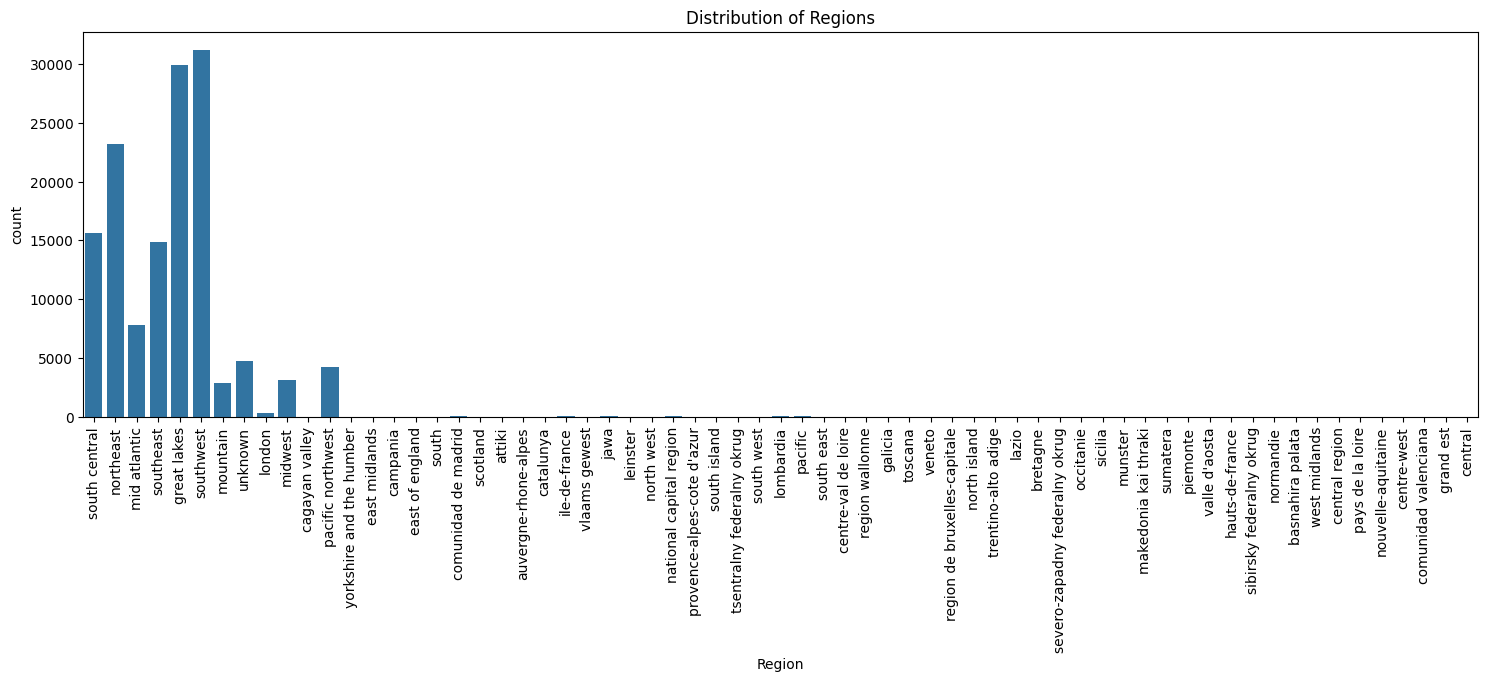

In [ ]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Region', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

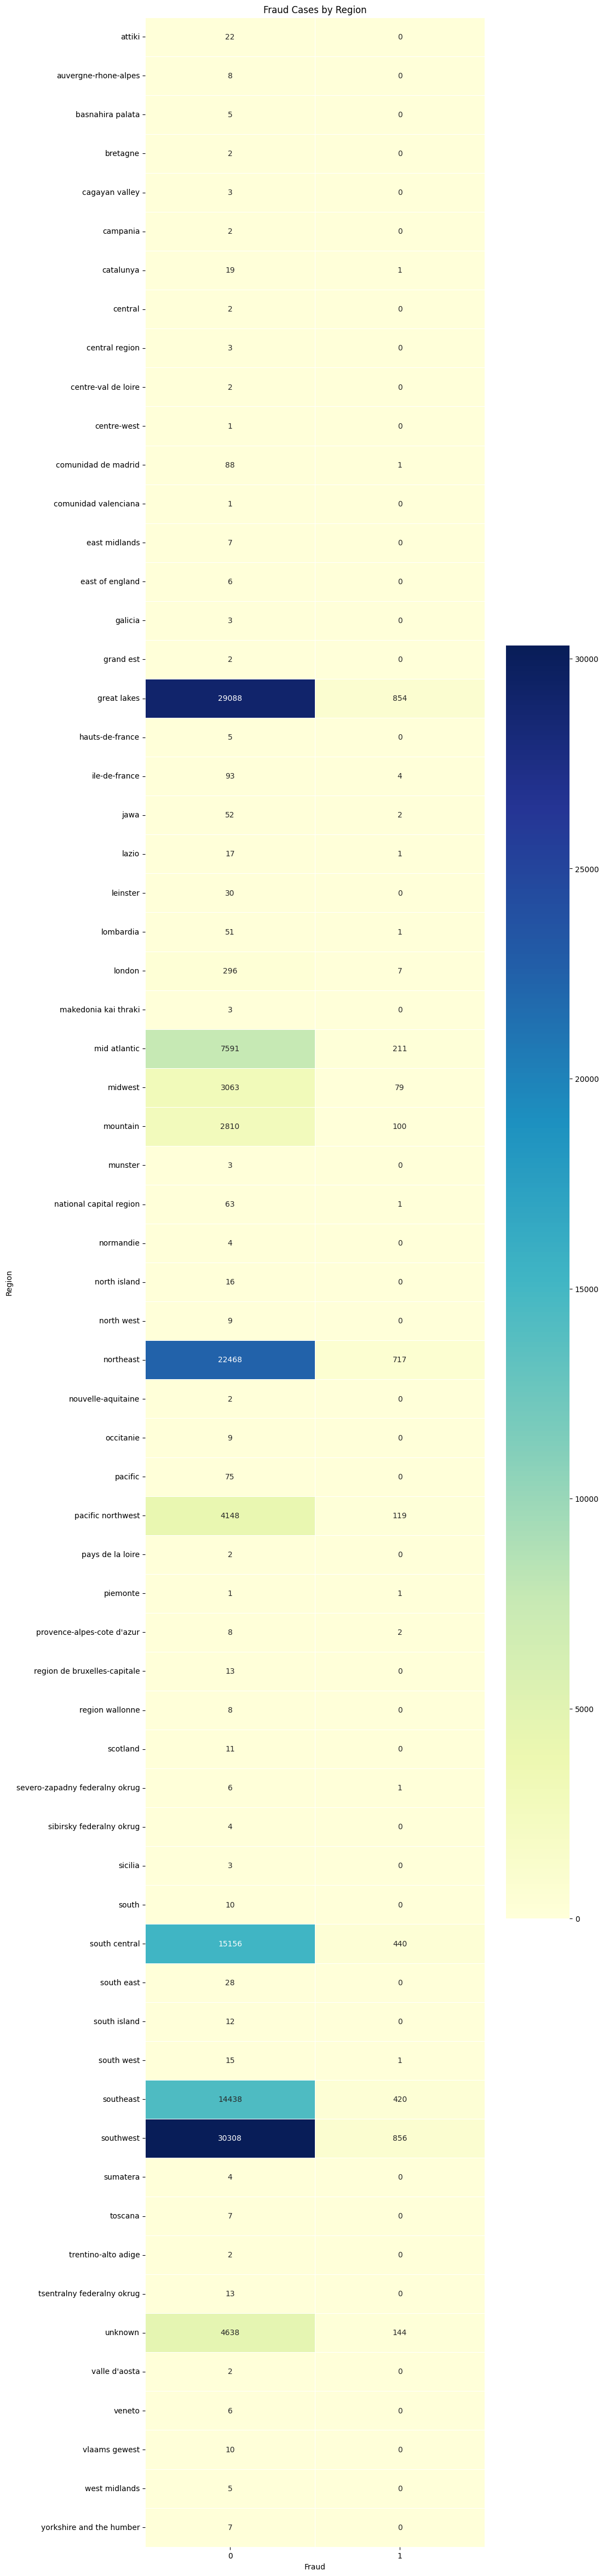

In [ ]:
plt.figure(figsize=(10, 60))
grouped_data = df.groupby(['Region', 'Fraud']).size().reset_index(name='Count')

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='Region', columns='Fraud', values='Count', fill_value=0)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

plt.title('Fraud Cases by Region')
plt.xlabel('Fraud')
plt.ylabel('Region')

plt.show()

 Observations:
Highest 0(No Fraud): Southwest(30308)
Highest 1(Fraud): Southwest(856)

In [ ]:
# Assuming df is your DataFrame with 'Region' and 'Fraud' column
crosstab_ratio = pd.crosstab(df['Region'], df['Fraud']).apply(lambda row: row / row.sum(), axis=1)
crosstab_ratio

Fraud                        0     1
Region                              
attiki                   1.000 0.000
auvergne-rhone-alpes     1.000 0.000
basnahira palata         1.000 0.000
bretagne                 1.000 0.000
cagayan valley           1.000 0.000
...                        ...   ...
valle d'aosta            1.000 0.000
veneto                   1.000 0.000
vlaams gewest            1.000 0.000
west midlands            1.000 0.000
yorkshire and the humber 1.000 0.000

[65 rows x 2 columns]

Observations: lazio' & 'ile-de-france' have the highest ratio of Login Frauds.

In [ ]:
# Select only those rows which do not have ratio 1:0

In [ ]:
# Step 1: Group by 'Region' and calculate the sum of 'Fraud'
total_fraud_by_region = df.groupby('Region')['Fraud'].sum()

# Step 2: Identify categories with sum greater than 0
regions_with_fraud = total_fraud_by_region[total_fraud_by_region > 0].index

# Step 3: Filter the DataFrame
df1 = df[df['Region'].isin(regions_with_fraud)]

# Now, 'filtered_data' contains rows where 'Region' categories have a sum of 'Fraud' greater than 0

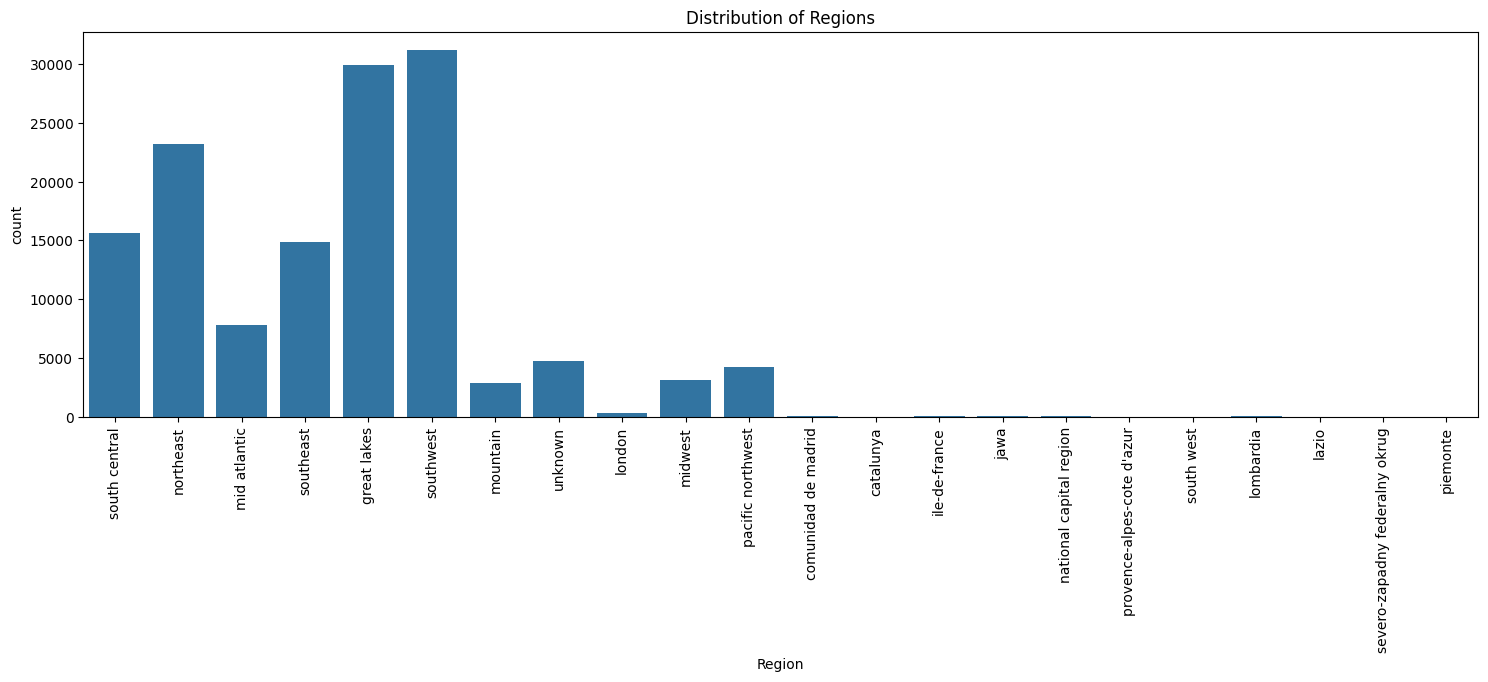

In [ ]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Region', data=df1)
plt.xticks(rotation=90)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

No check for state and country

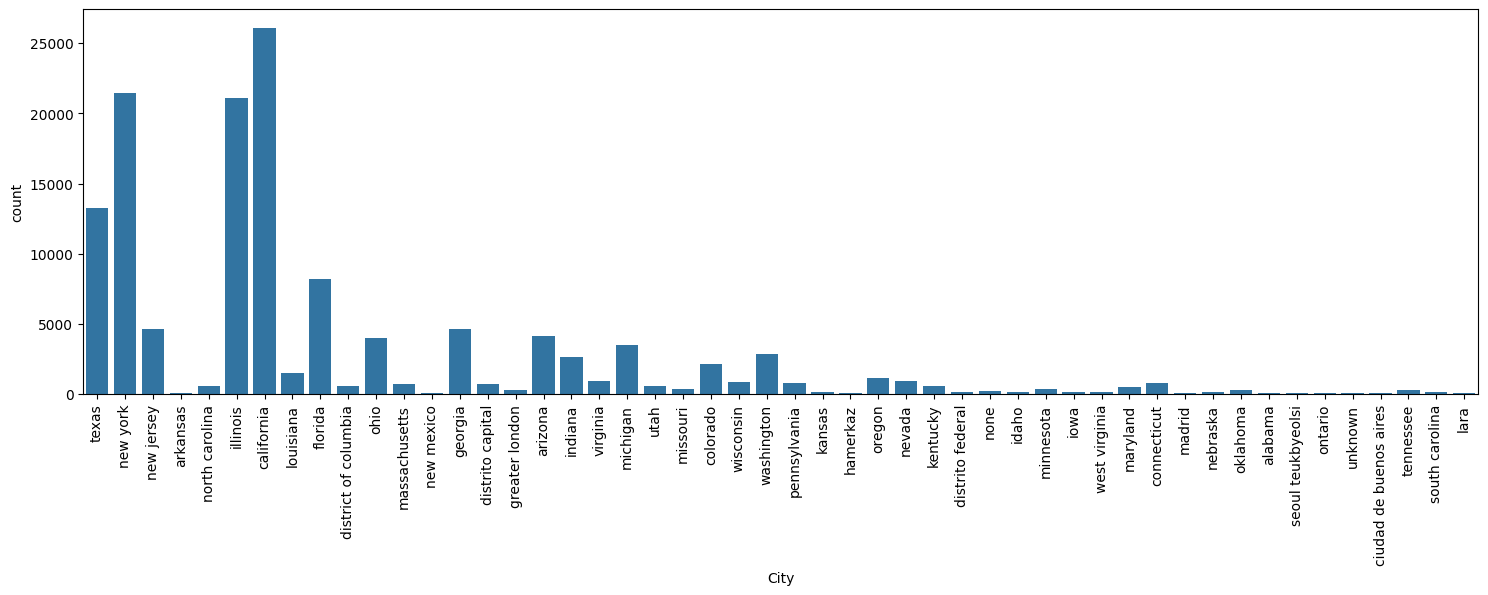

In [ ]:
# Step 1: Get the top 50 cities based on their counts
top_cities = df1['City'].value_counts().nlargest(50).index

# Step 2: Filter the DataFrame for the top 50 cities
m_top50_cities = df1[df1['City'].isin(top_cities)]

# Step 3: Plot the count plot
plt.figure(figsize=(18, 5))
sns.countplot(x='City', data=m_top50_cities)
plt.xticks(rotation=90)

# Display the plot
plt.show()


observations:Top 3 states frequency-wise are: california, new York & illinois.

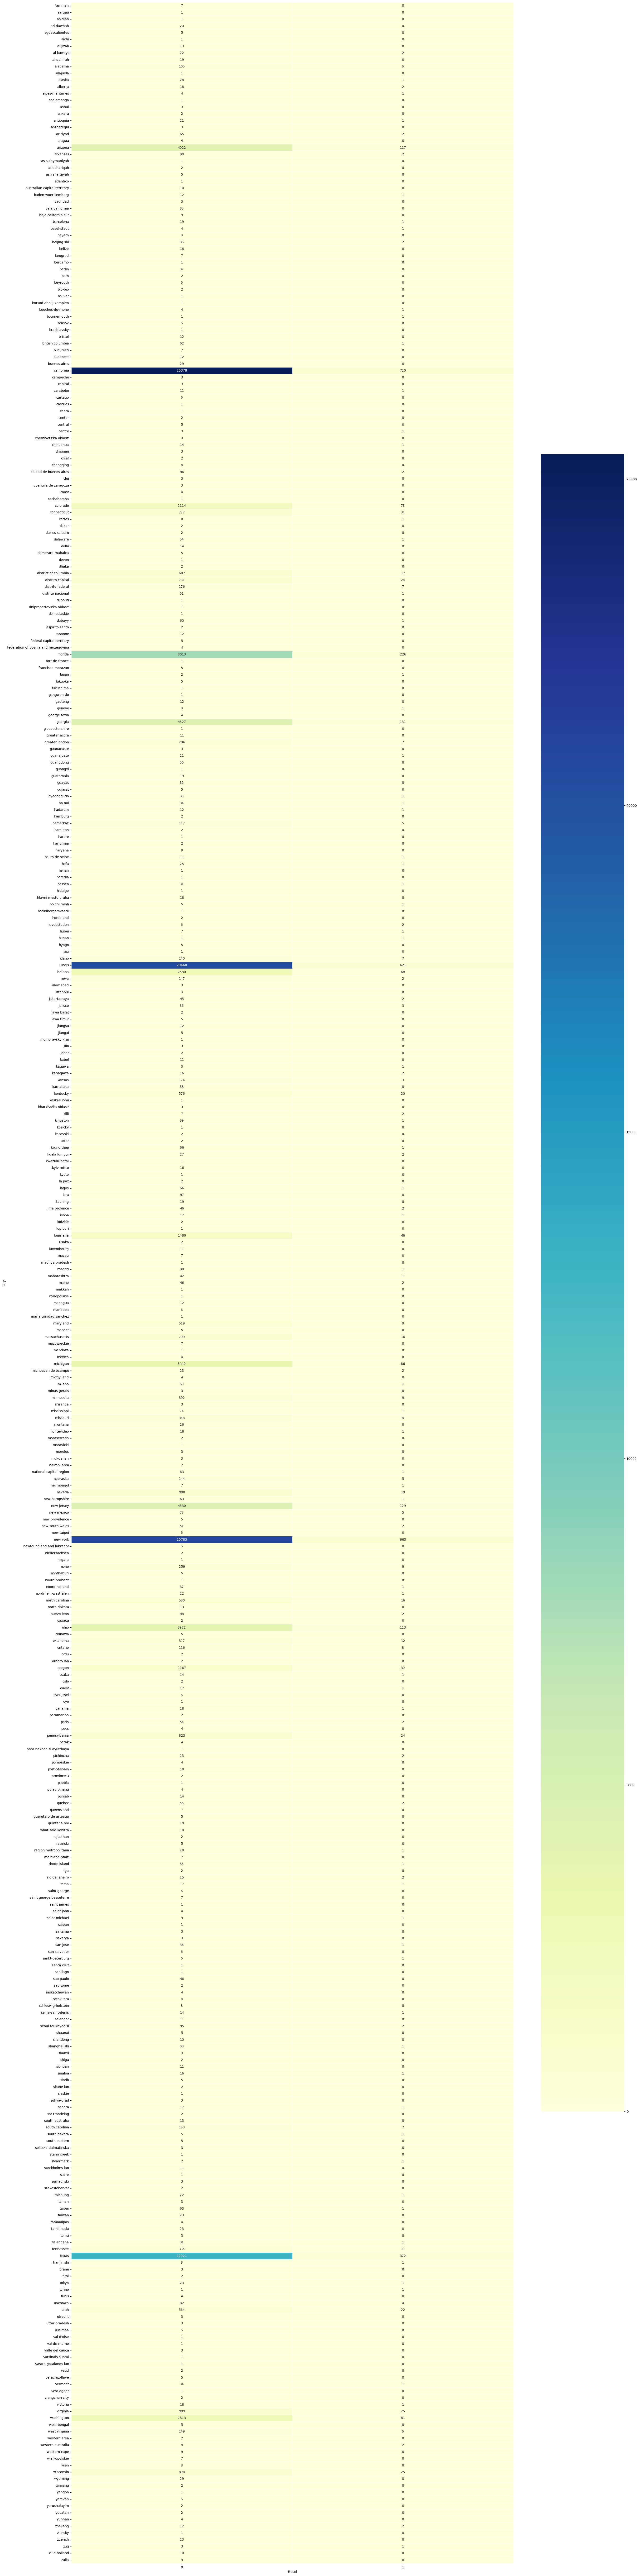

In [ ]:
# Assuming df1 is your DataFrame with 'City' and 'Fraud' columns

# Step 1: Group by 'city' and 'Fraud' and calculate the count
grouped_data = df1.groupby(['City', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='City', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(30, 140))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

observations: Here we can see the Frauds with repect to each City.
Highest 0(No Fraud): beunos aries(25378)
Highest 1(Fraud): Southwest(720)

In [ ]:
# Assuming df is your DataFrame with 'City' and 'Fraud' column
crosstab_ratio = pd.crosstab(df1['City'], df['Fraud']).apply(lambda row: row / row.sum(), axis=1)
crosstab_ratio

Fraud              0     1
City                      
`amman         1.000 0.000
aargau         1.000 0.000
abidjan        1.000 0.000
ad dawhah      1.000 0.000
aguascalientes 1.000 0.000
...              ...   ...
zilinsky       1.000 0.000
zuerich        1.000 0.000
zug            0.750 0.250
zuid-holland   1.000 0.000
zulia          1.000 0.000

[379 rows x 2 columns]

Observations:'fujian', 'western australia' & 'steiermark' have the highest ratio of Login Frauds.

In [ ]:
# Step 1: Group by 'City' and calculate the sum of 'Fraud'
total_fraud_by_city = df1.groupby('City')['Fraud'].sum()

# Step 2: Identify categories with sum greater than 0
cities_with_fraud = total_fraud_by_city[total_fraud_by_city > 0].index

# Step 3: Filter the DataFrame
df2 = df1[df1['City'].isin(cities_with_fraud)]

# Now, 'filtered_data' contains rows where 'Region' categories have a sum of 'Fraud' greater than 0

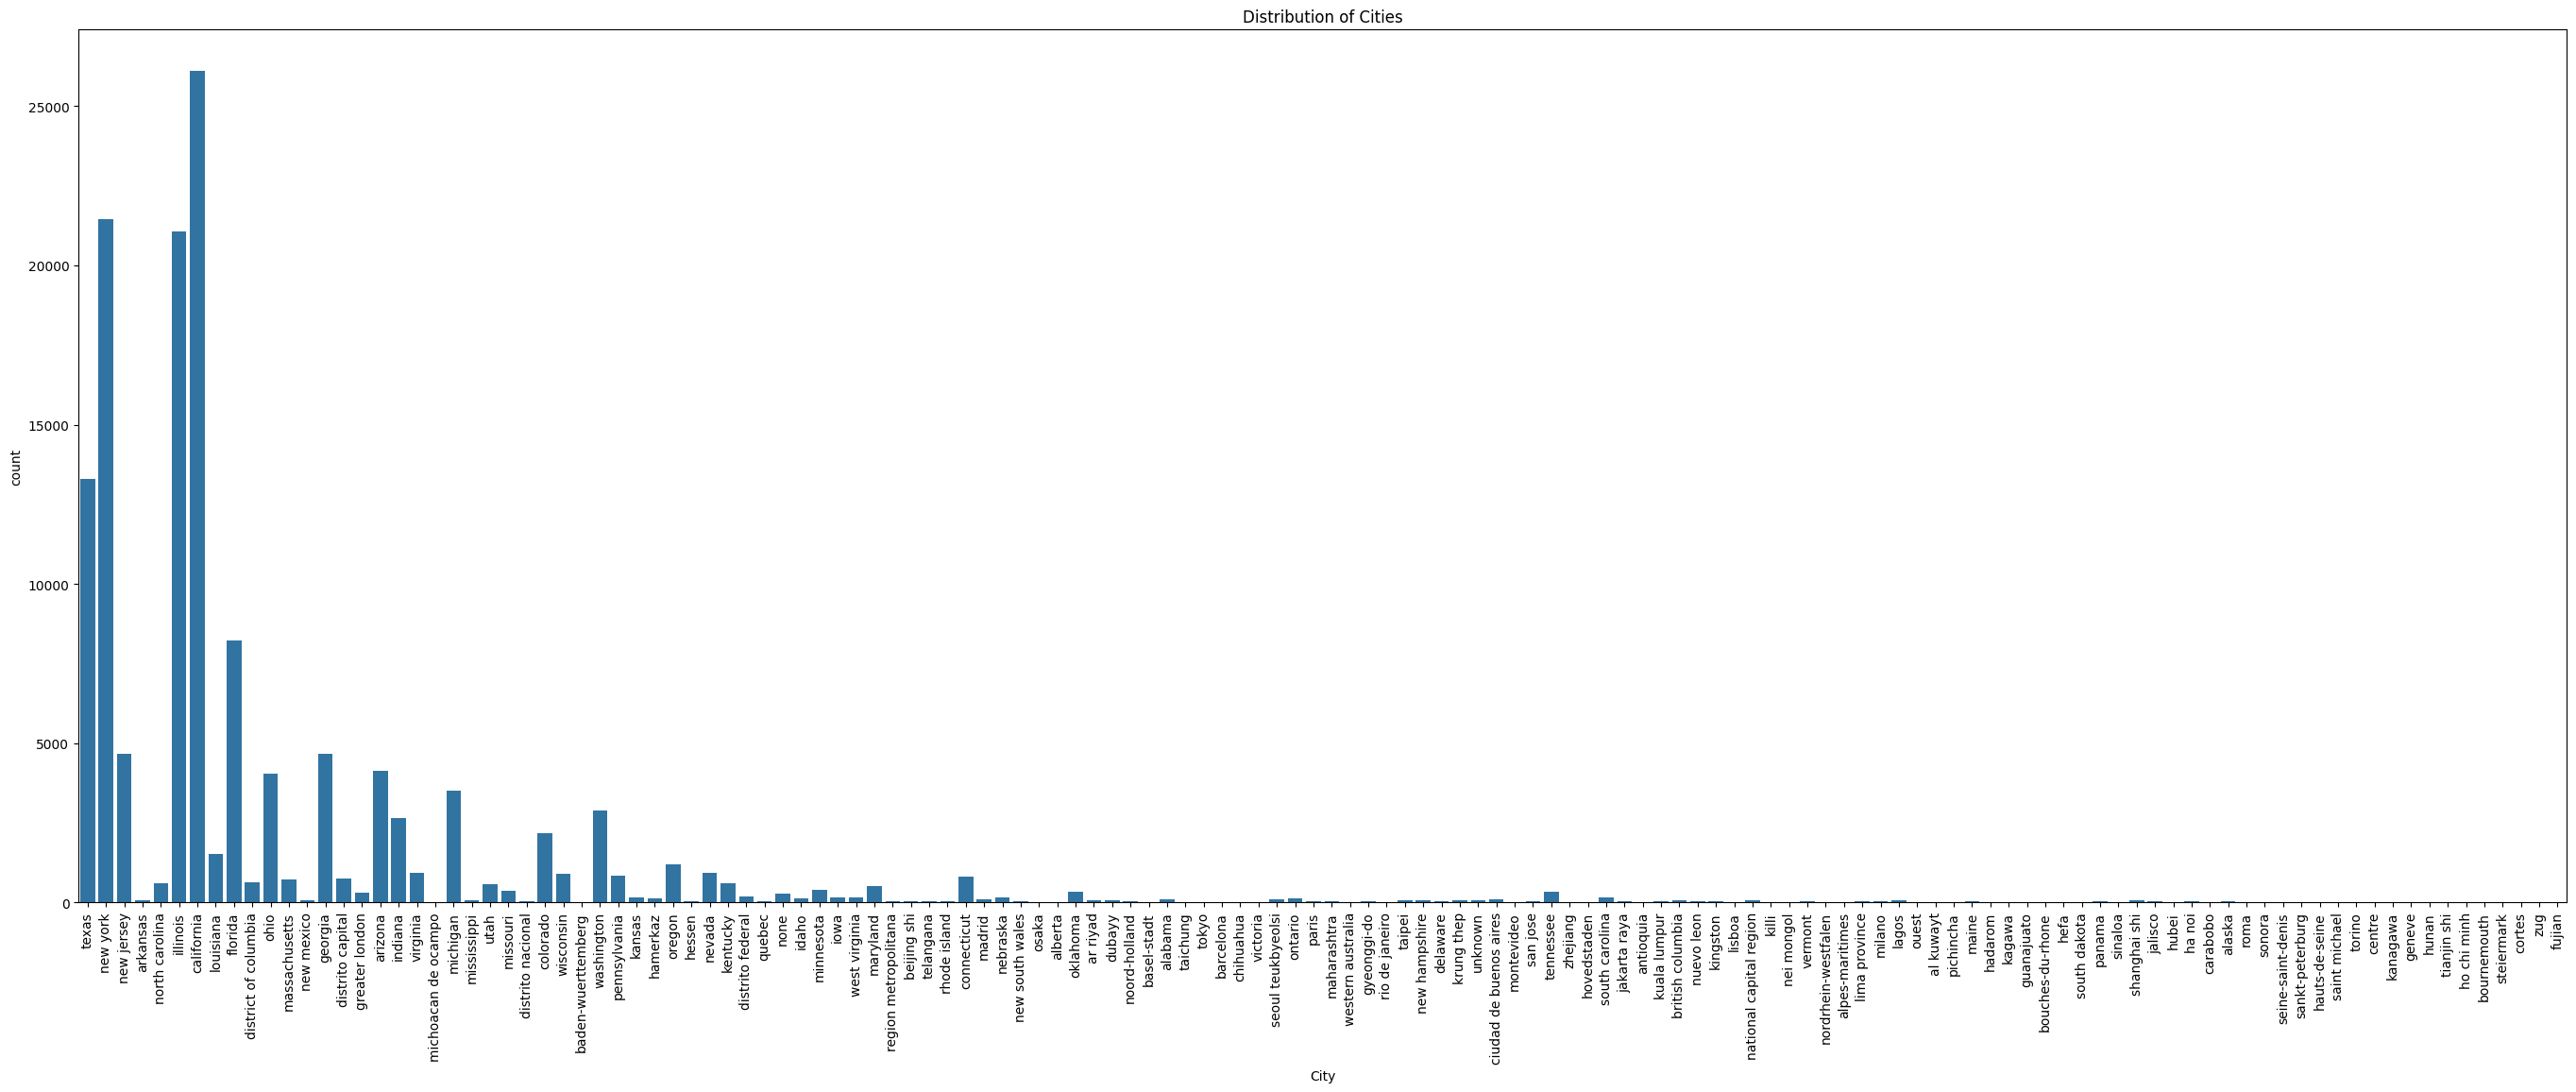

In [ ]:
plt.figure(figsize=(34, 12))
sns.countplot(x='City', data=df2)
plt.xticks(rotation=90)
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('count')
plt.show()

In [ ]:
# lets see for the country

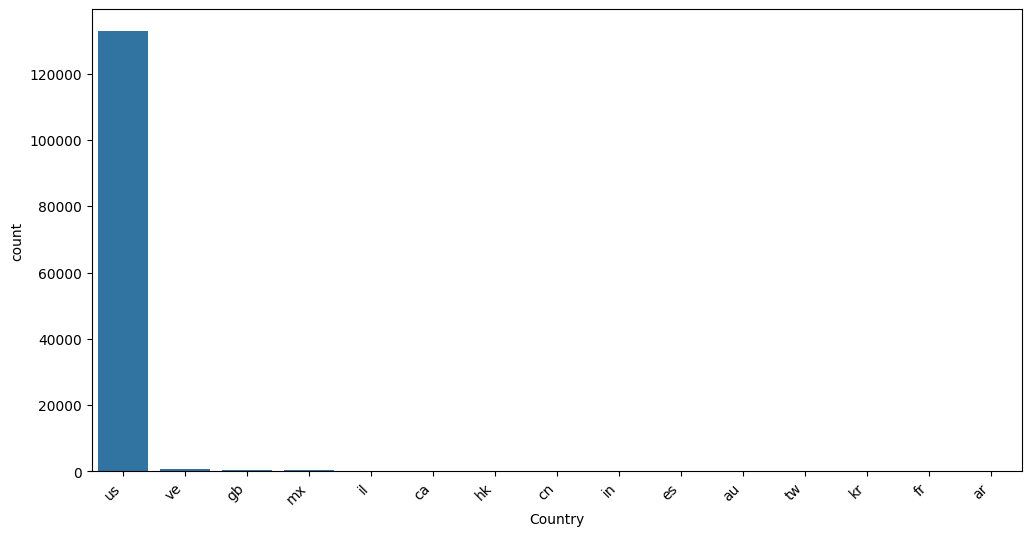

In [ ]:
# Assuming df2 is your DataFrame with 'Country' column

# Step 1: Get the top 15 countries based on their counts
top_countries = df2['Country'].value_counts().nlargest(15).index

# Step 2: Filter the DataFrame for the top 15 countries
df_top15_countries = df2[df2['Country'].isin(top_countries)]

# Step 3: Plot the count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df_top15_countries)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()

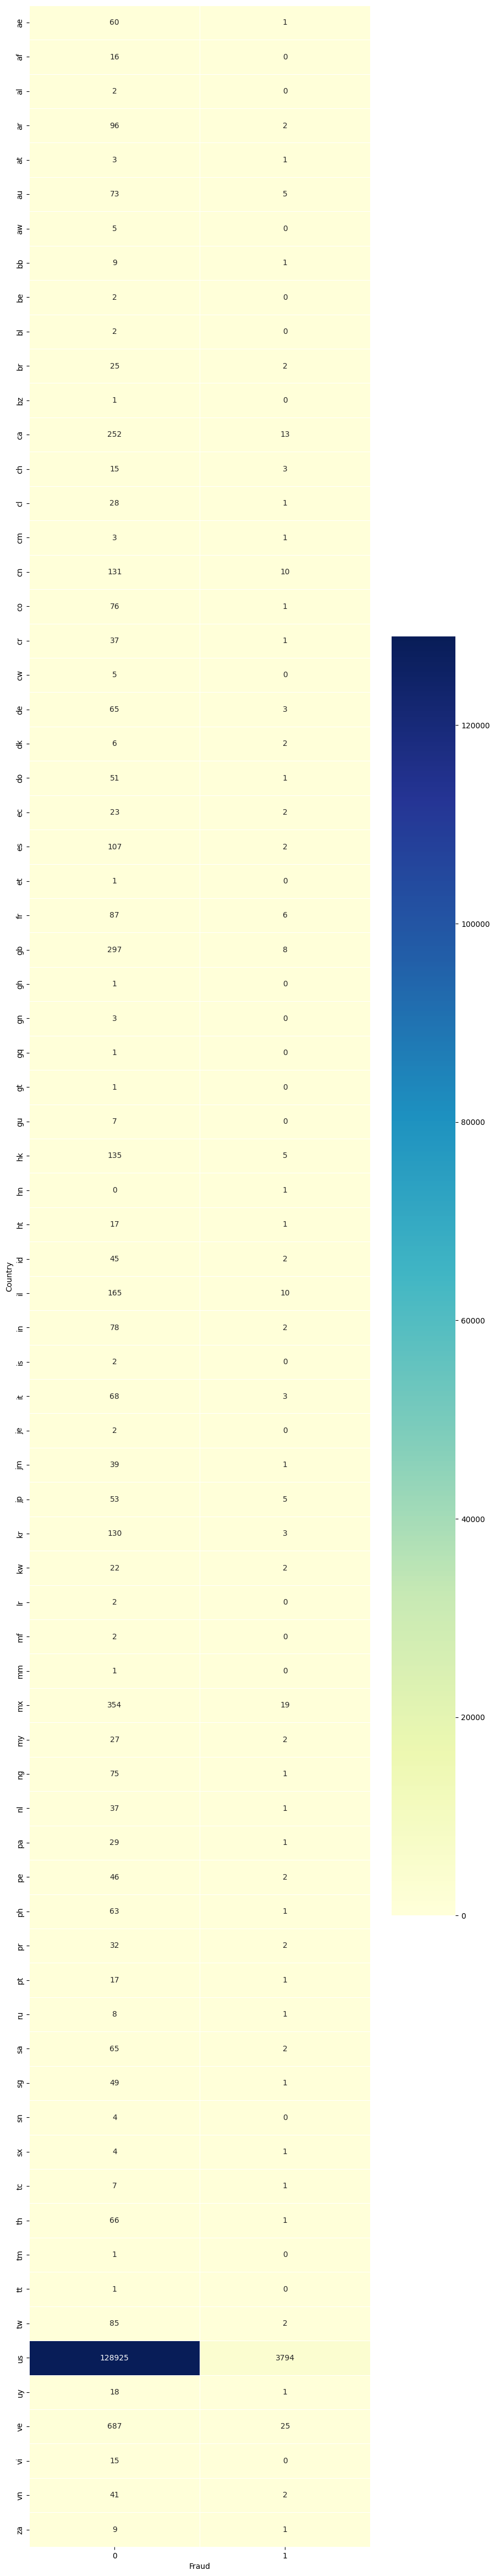

In [ ]:
# Assuming df1 is your DataFrame with 'country' and 'Fraud' columns

# Step 1: Group by 'country' and 'Fraud' and calculate the count
grouped_data = df2.groupby(['Country', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='Country', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 60))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

observations: Here we can see the Frauds wrt each Country.
Highest 0(No Fraud): us(128925)
Highest 1(Fraud): us(3794)

In [ ]:
 # Assuming df is your DataFrame with 'Country' and 'Fraud' column
crosstab_ratio = pd.crosstab(df2['Country'], df['Fraud']).apply(lambda row: row / row.sum(), axis=1)
crosstab_ratio

Fraud       0     1
Country            
ae      0.984 0.016
af      1.000 0.000
al      1.000 0.000
ar      0.980 0.020
at      0.750 0.250
...       ...   ...
uy      0.947 0.053
ve      0.965 0.035
vi      1.000 0.000
vn      0.953 0.047
za      0.900 0.100

[74 rows x 2 columns]

observations: 'at' has the highest ratio of Login Frauds.

In [ ]:
# Step 1: Group by 'Country' and calculate the sum of 'Fraud'
total_fraud_by_country = df2.groupby('Country')['Fraud'].sum()

# Step 2: Identify categories with sum greater than 0
countries_with_fraud = total_fraud_by_country[total_fraud_by_country > 0].index

# Step 3: Filter the DataFrame
df3 = df2[df2['Country'].isin(countries_with_fraud)]

# Now, 'filtered_data' contains rows where 'Country' categories have a sum of 'Fraud' greater than 0

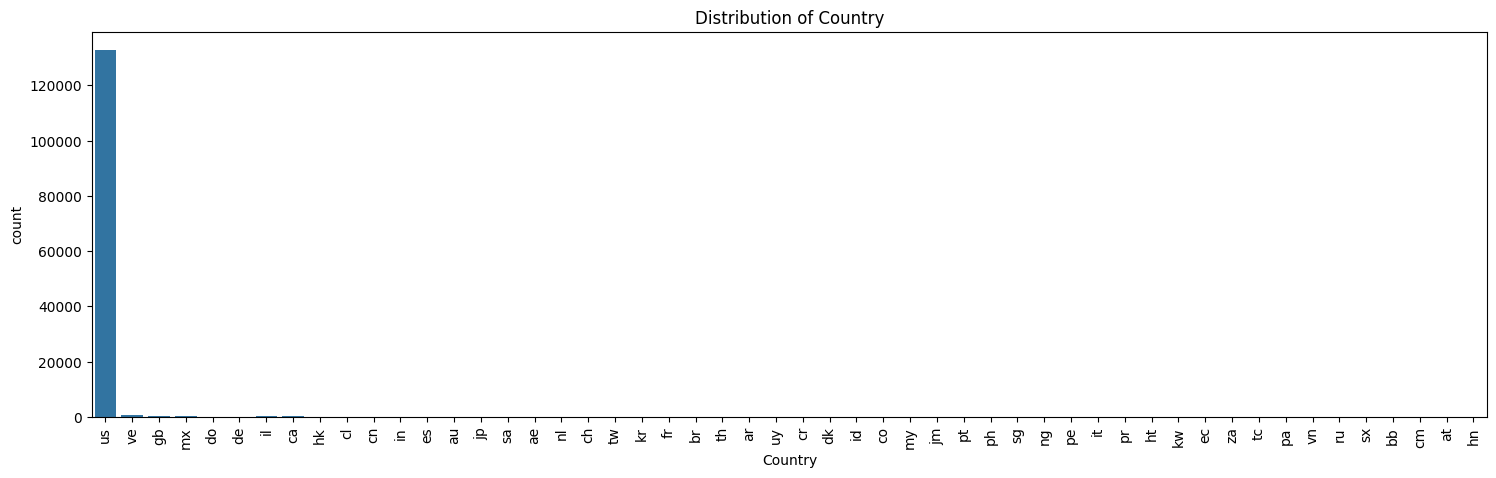

In [ ]:
plt.figure(figsize=(18, 5))
sns.countplot(x='Country', data=df3)
plt.xticks(rotation=90)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

In [ ]:
# Finding unknown values in the columns
count_unknown_city = (df3['City'] == 'unknown').sum()
count_unknown_region = (df3['Region'] == 'unknown').sum()
count_unknown_country = (df3['Country'] == 'unknown').sum()

In [ ]:
print("Number of 'unknown' records in 'country' column:", count_unknown_country)
print("Number of 'unknown' records in 'Region' column:", count_unknown_region)
print("Number of 'unknown' records in 'City' column:", count_unknown_city)

Number of 'unknown' records in 'country' column: 0
Number of 'unknown' records in 'Region' column: 3361
Number of 'unknown' records in 'City' column: 46


In [ ]:
# Replace 'unknown' with np.nan in the 'Region' and 'City' columns
df3['Region'] = df3['Region'].replace('unknown', np.nan)
df3['City'] = df3['City'].replace('unknown', np.nan)

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# V1CF

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3['V1CF'] = scaler.fit_transform(df3[['V1CF']])

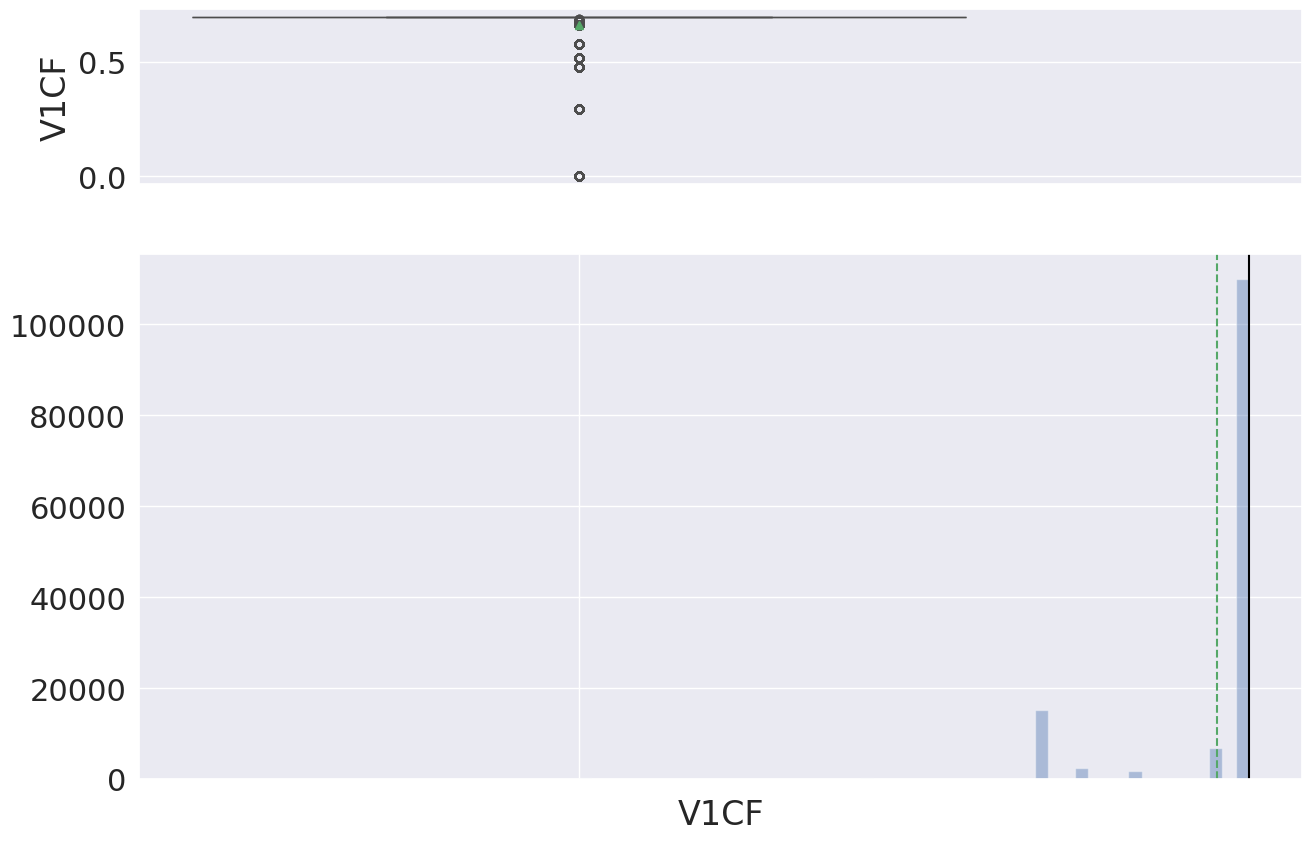

In [ ]:
histogram_boxplot(np.log1p(df3.V1CF))

# V2CF

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3['V2CF'] = scaler.fit_transform(df3[['V2CF']])

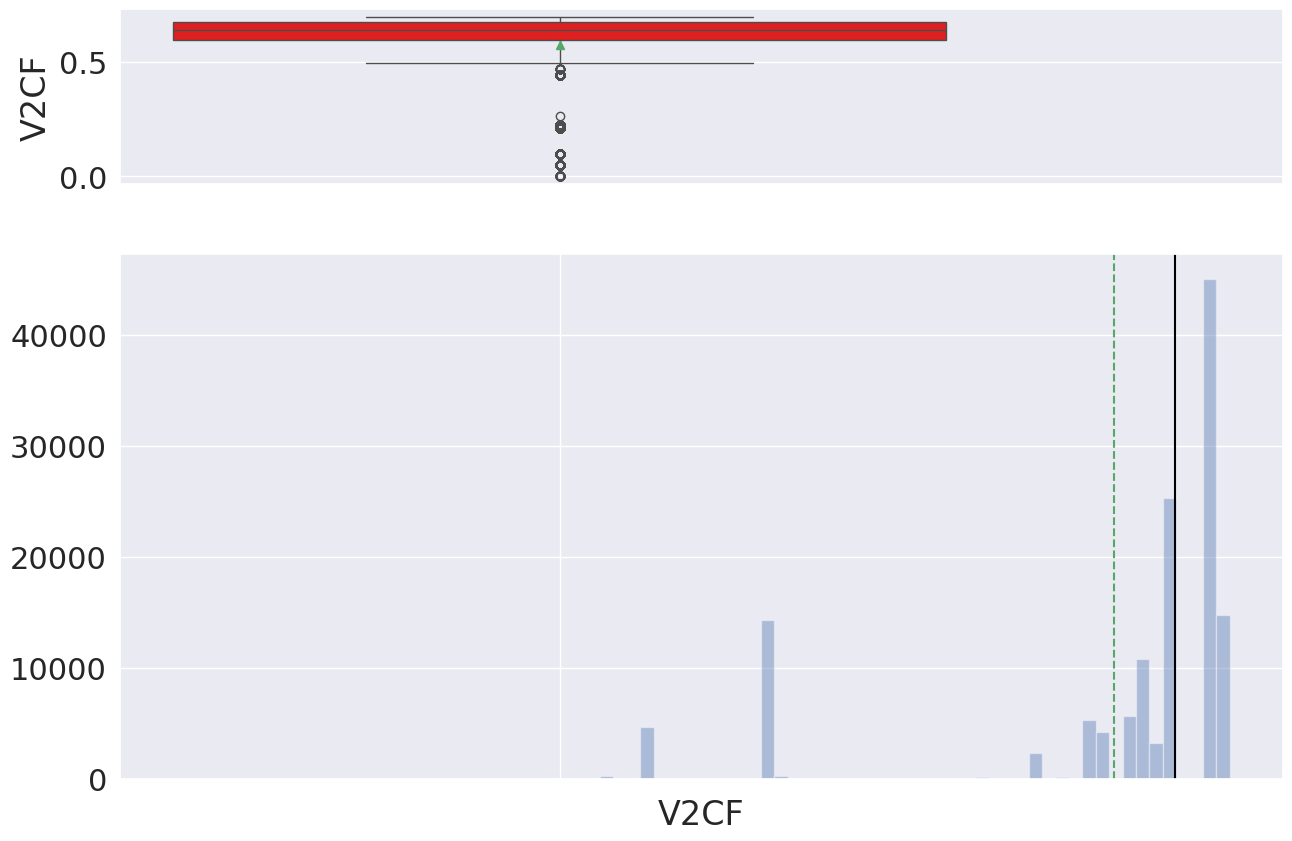

In [ ]:
histogram_boxplot(np.log1p(df3.V2CF))

# V3CF

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3['V3CF'] = scaler.fit_transform(df3[['V3CF']])

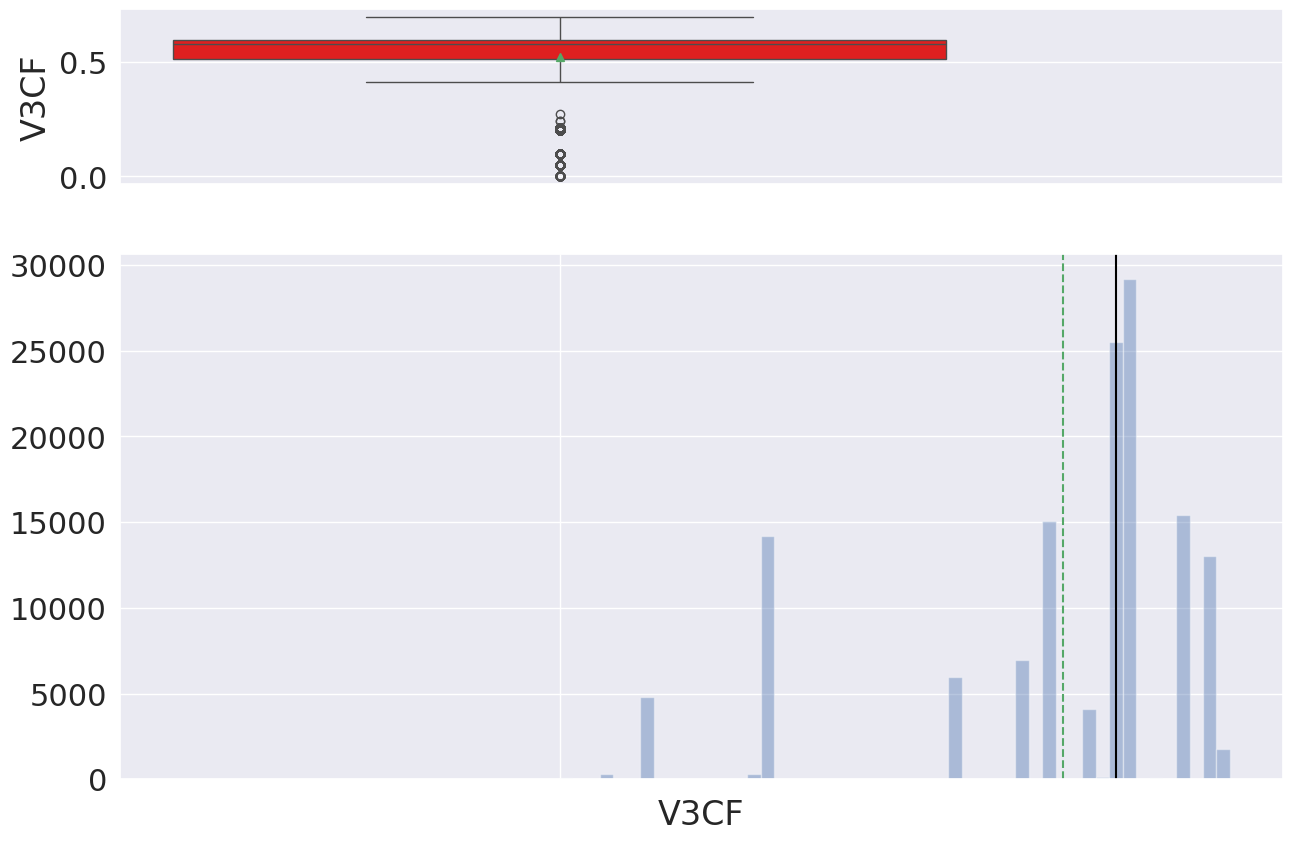

In [ ]:
histogram_boxplot(np.log1p(df3.V3CF))

# V4CF

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3['V4CF'] = scaler.fit_transform(df3[['V4CF']])

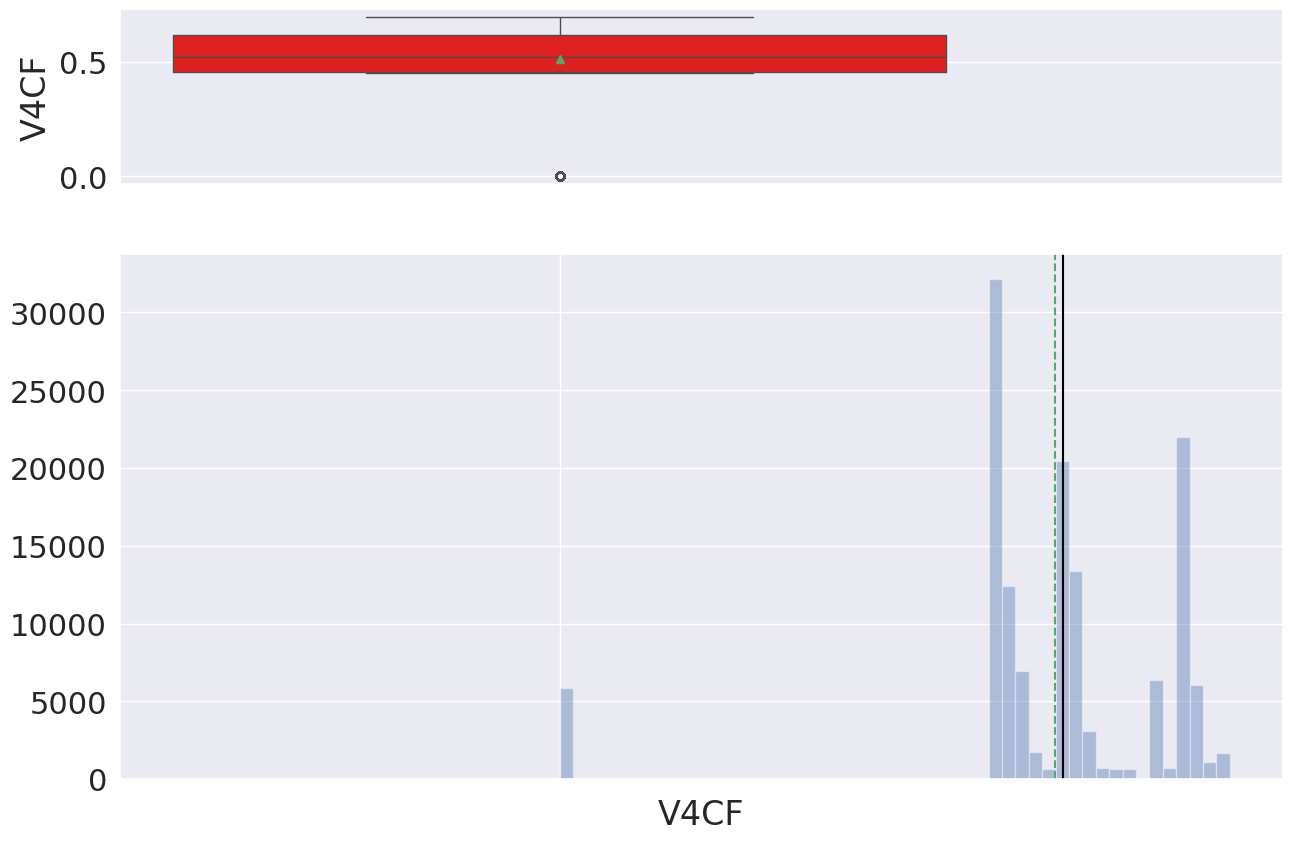

In [ ]:
histogram_boxplot(np.log1p(df3.V4CF))

# V5CF

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3['V5CF'] = scaler.fit_transform(df3[['V5CF']])

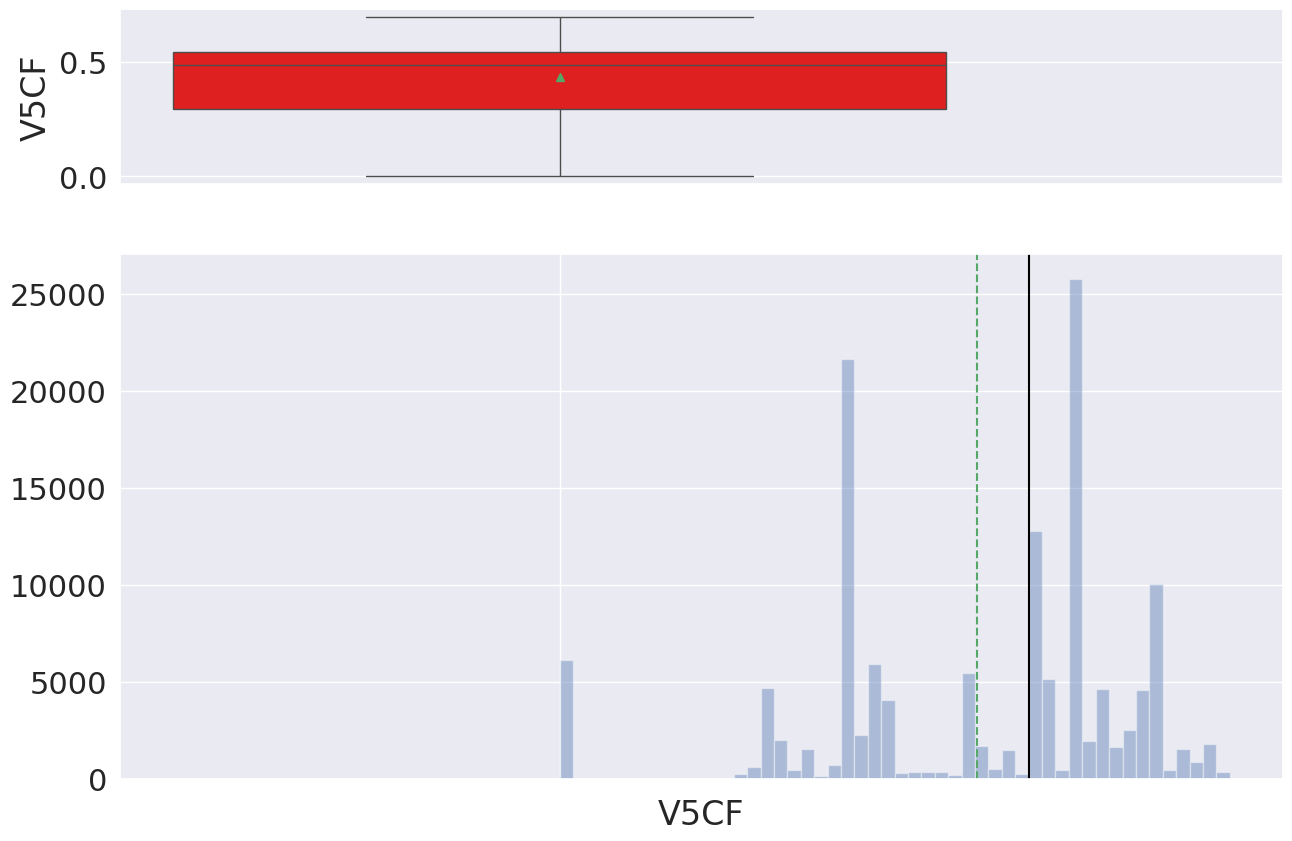

In [ ]:
histogram_boxplot(np.log1p(df3.V5CF))

# Area Code

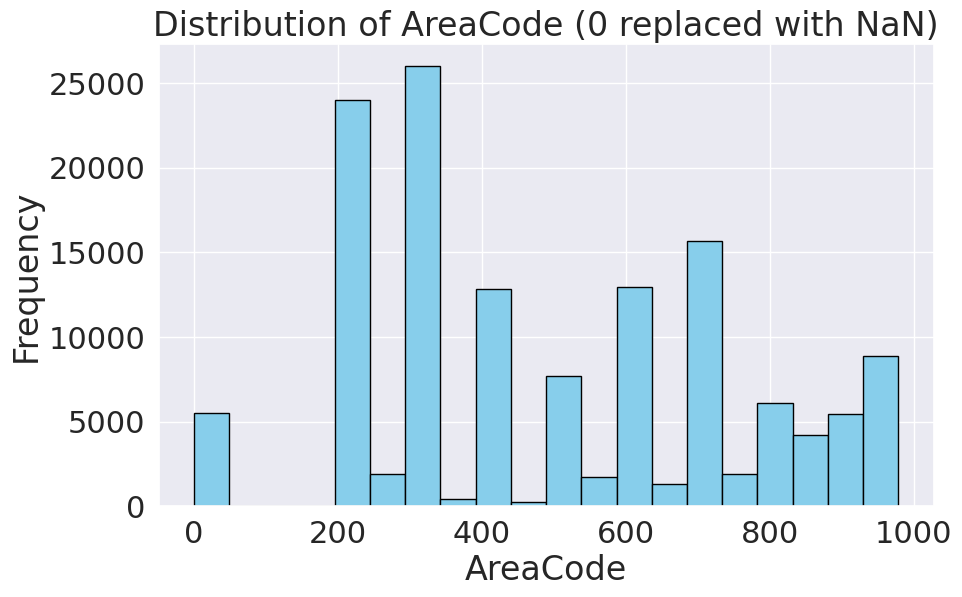

In [ ]:
# Replace 0 with NaN
df['AreaCode'] = df3['AreaCode'].replace(0, np.nan)

# Visualize the cleaned data
plt.figure(figsize=(10, 6))
plt.hist(df3['AreaCode'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of AreaCode (0 replaced with NaN)')
plt.xlabel('AreaCode')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# ConnectionOrg

In [ ]:
# Create a new column with the grouped or renamed values using map and a lambda function
df3['GroupedConnectionOrg'] = df3['ConnectionOrg'].map(lambda x: ' '.join(x.split()[:2]))

# Display the result
print(df3['GroupedConnectionOrg'])

0         013 netvision
1         013 netvision
2         013 netvision
3         013 netvision
4         013 netvision
              ...      
138747      zynga corp.
138748      zynga corp.
138749      zynga corp.
138750      zynga corp.
138751      zynga corp.
Name: GroupedConnectionOrg, Length: 136803, dtype: object


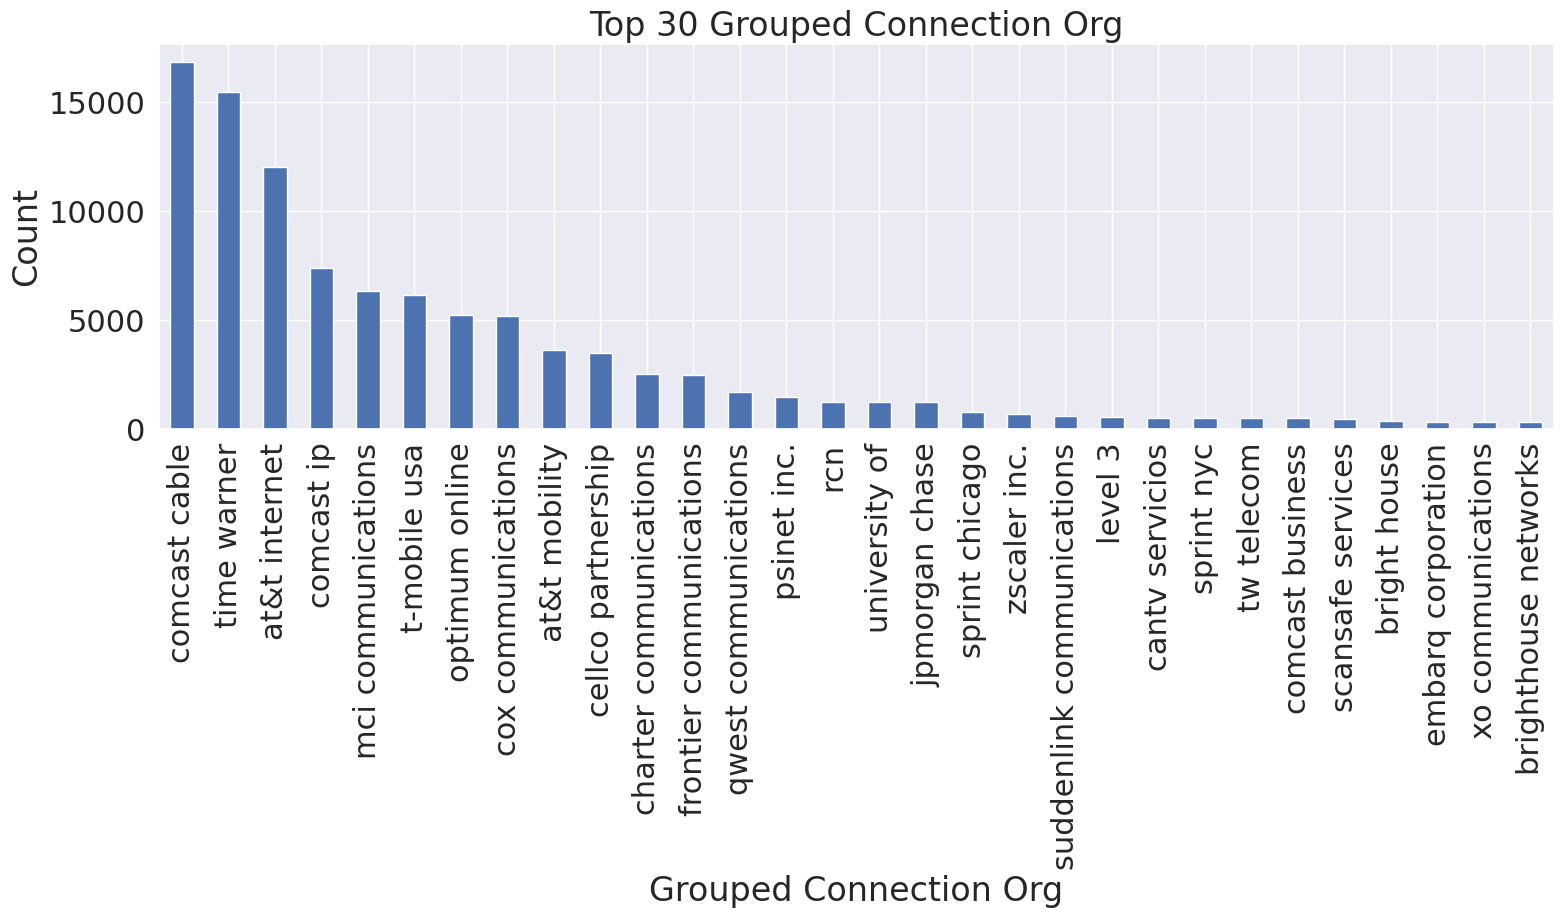

In [ ]:
# Assuming df3 is your DataFrame
top_states = df3['GroupedConnectionOrg'].value_counts().nlargest(30).index
m_top15 = df3[df3['GroupedConnectionOrg'].isin(top_states)]

plt.figure(figsize=(18, 5))
m_top15['GroupedConnectionOrg'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Grouped Connection Org')
plt.ylabel('Count')
plt.title('Top 30 Grouped Connection Org')
plt.show()

In [ ]:
# Create a new column with the first word of each value in 'ConnectionOrg'
df3['GroupedConnectionOrg1'] = df3['ConnectionOrg'].str.split().str[0]

# Display the result
print(df3['GroupedConnectionOrg1'])

0           013
1           013
2           013
3           013
4           013
          ...  
138747    zynga
138748    zynga
138749    zynga
138750    zynga
138751    zynga
Name: GroupedConnectionOrg1, Length: 136803, dtype: object


In [ ]:
df3['ConnectionOrg'].value_counts()

time warner cable internet llc                              15470
at&t internet services                                      12047
comcast ip services  l.l.c.                                  7399
comcast cable communications  inc.                           6593
mci communications services  inc. d/b/a verizon business     6328
                                                            ...  
ramtron corporation                                             1
associates mccabe                                               1
holland & knight - 52nd street nyc-82                           1
holiday inn sunspree resort                                     1
city of diamond bar                                             1
Name: ConnectionOrg, Length: 7572, dtype: int64

In [ ]:
df3['GroupedConnectionOrg'].value_counts()

comcast cable         16825
time warner           15483
at&t internet         12047
comcast ip             7399
mci communications     6328
                      ...  
mobitel pvt               1
bernard p.                1
mohg hotel                1
bermello ajamil           1
lam research              1
Name: GroupedConnectionOrg, Length: 6774, dtype: int64

In [ ]:
df3['GroupedConnectionOrg1'].value_counts()

comcast        24721
at&t           15934
time           15487
mci             6328
t-mobile        6144
               ...  
medassets          1
mechanix           1
mechanicnet        1
mechan             1
milwaukee          1
Name: GroupedConnectionOrg1, Length: 5001, dtype: int64

observations: After selecting the 1st two words the categories reduced from :
7572 ----> 6774 ----> 5001

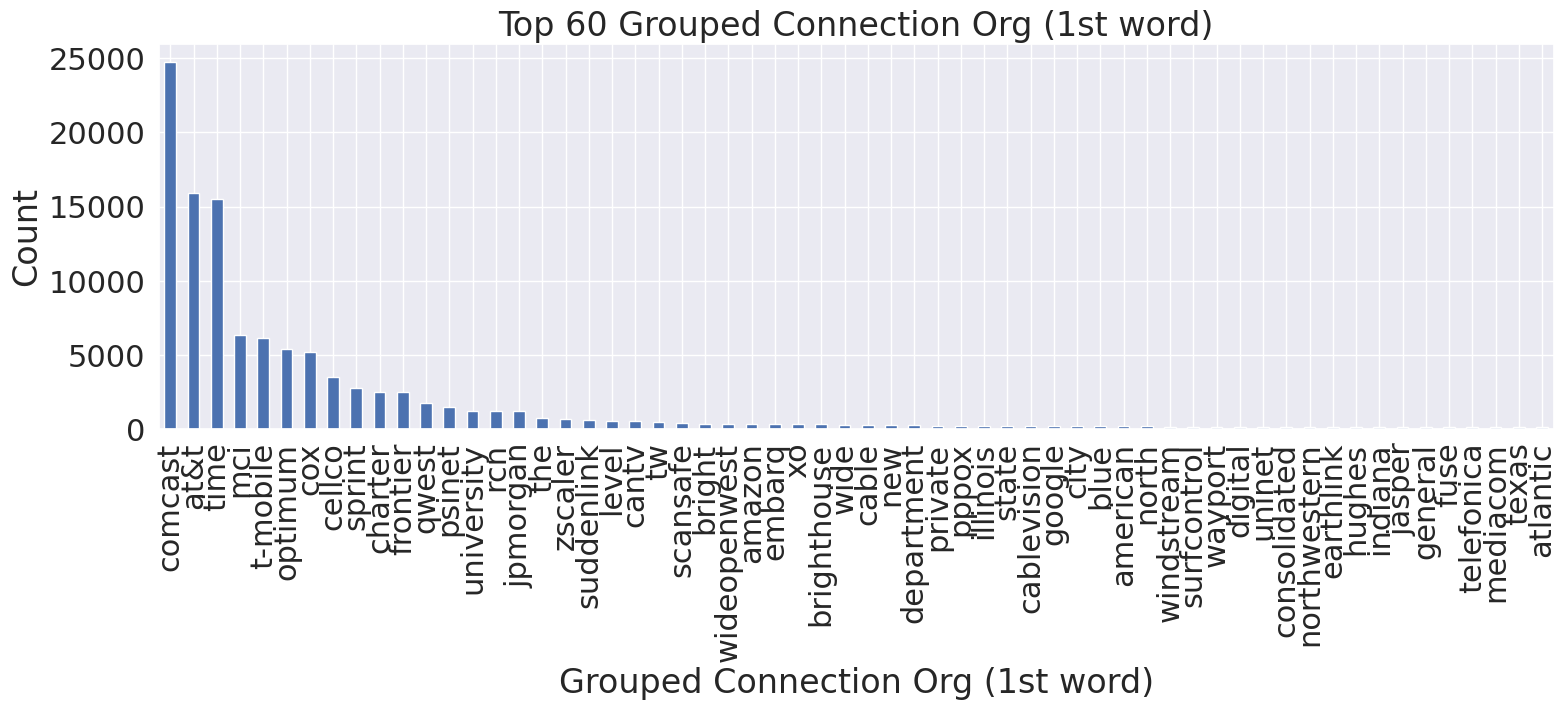

In [ ]:
# Assuming df3 is your DataFrame
top_states = df3['GroupedConnectionOrg1'].value_counts().nlargest(60).index
m_top15 = df3[df3['GroupedConnectionOrg1'].isin(top_states)]

plt.figure(figsize=(18, 5))
m_top15['GroupedConnectionOrg1'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Grouped Connection Org (1st word)')
plt.ylabel('Count')
plt.title('Top 60 Grouped Connection Org (1st word)')
plt.show()

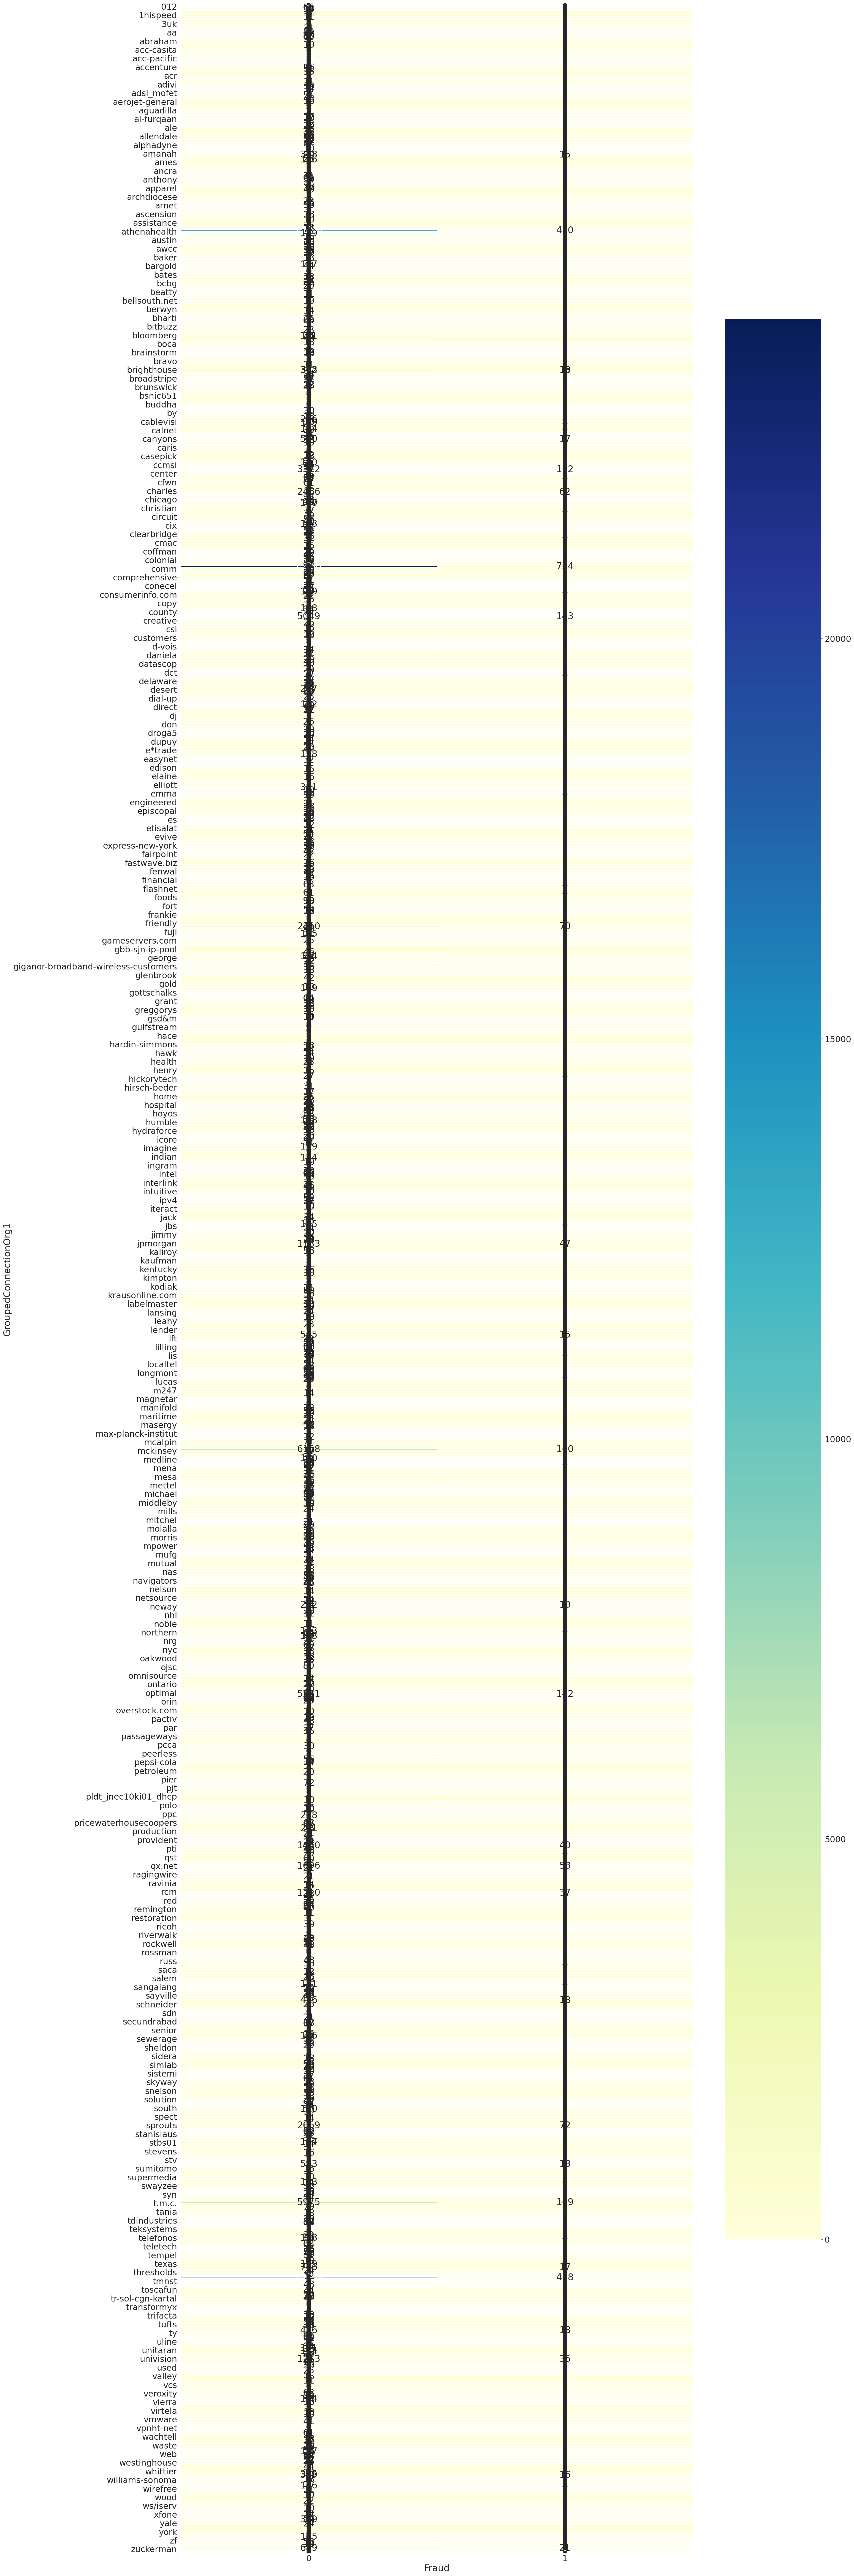

In [ ]:
# Step 1: Group by 'GroupedConnectionorg1' and 'Fraud' and calculate the count
grouped_data = df3.groupby(['GroupedConnectionOrg1', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='GroupedConnectionOrg1', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(30, 120))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

In [ ]:
# Assuming df3 is your DataFrame
grouped = df3.groupby(['GroupedConnectionOrg1', 'Fraud']).size().unstack(fill_value=0)
crosstab_ratio = grouped.div(grouped.sum(axis=1), axis=0)
crosstab_ratio

Fraud                     0     1
GroupedConnectionOrg1            
012                   1.000 0.000
013                   0.985 0.015
02                    1.000 0.000
099                   1.000 0.000
1                     1.000 0.000
...                     ...   ...
ztelco                1.000 0.000
zthernet              1.000 0.000
zuckerman             1.000 0.000
zuerinet              1.000 0.000
zynga                 1.000 0.000

[5001 rows x 2 columns]

In [ ]:
# Step 1: Group by 'GroupedConnectionOrg1' and calculate the sum of 'Fraud'
fraud_sum_by_GroupedConnectionOrg1 = df3.groupby('GroupedConnectionOrg1')['Fraud'].transform('sum')

# Step 2: Identify categories with sum more than 1
categories_to_keep = df3['GroupedConnectionOrg1'][fraud_sum_by_GroupedConnectionOrg1 > 1]

# Step 3: Filter and keep rows
df4 = df3[df3['GroupedConnectionOrg1'].isin(categories_to_keep)]

# Now, 'df4' contains rows where 'GroupedConnectionOrg1' categories have sum of 'Fraud' more than 1

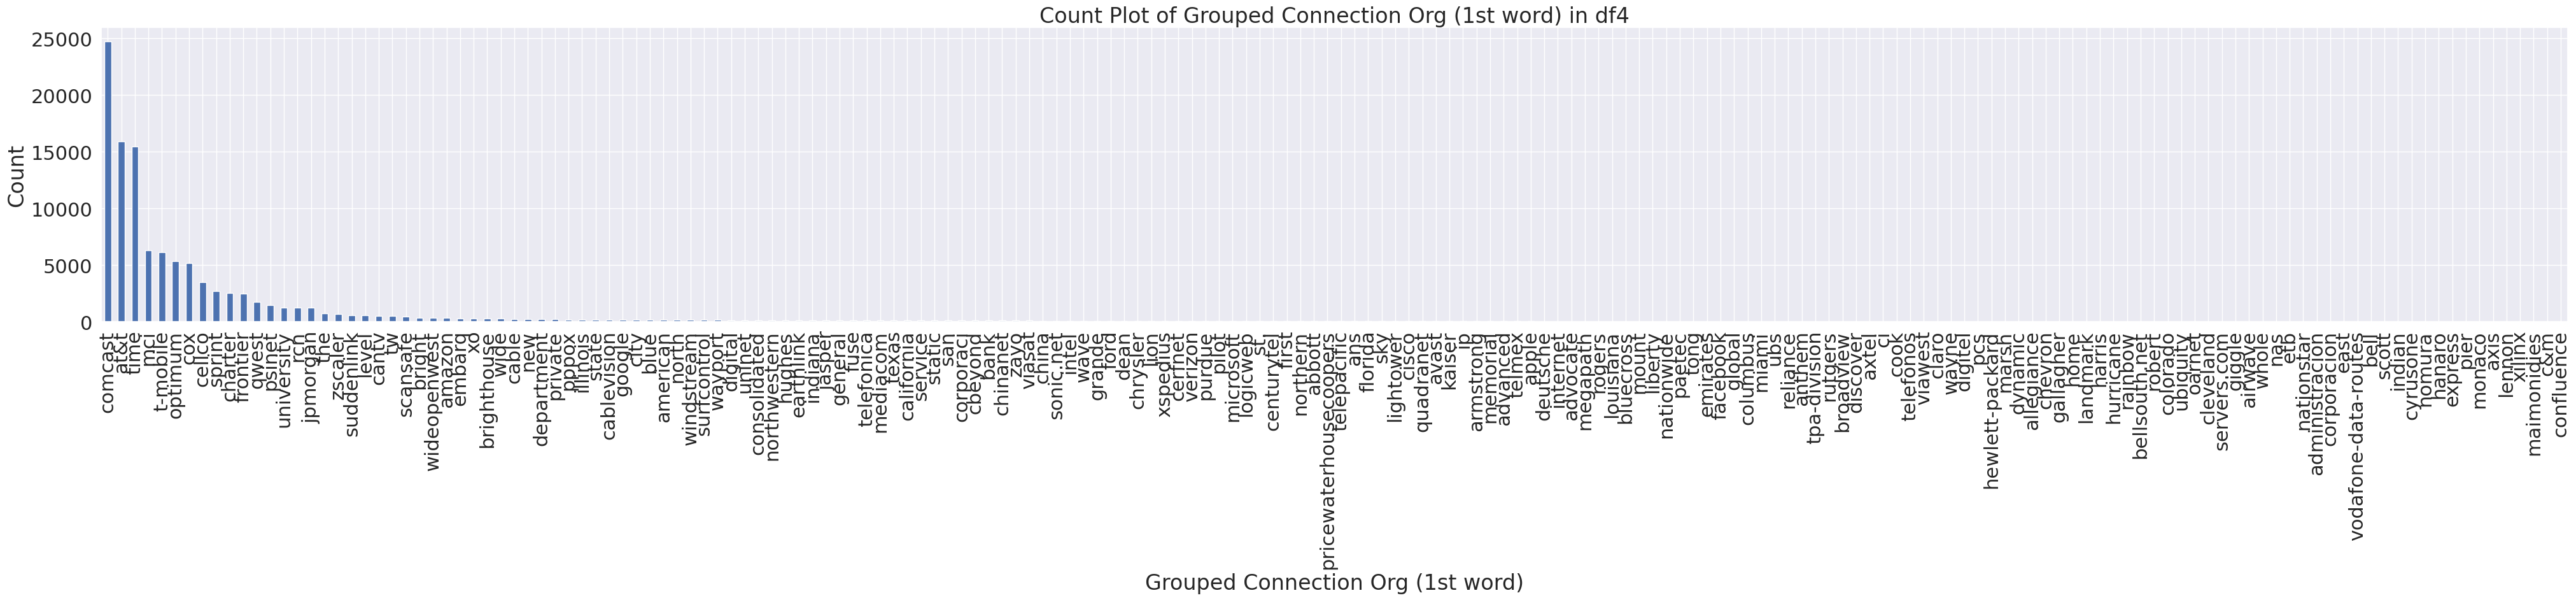

In [ ]:
plt.figure(figsize=(50, 6))
df4['GroupedConnectionOrg1'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Grouped Connection Org (1st word)')
plt.ylabel('Count')
plt.title('Count Plot of Grouped Connection Org (1st word) in df4')
plt.show()

# Connection Type

Editing unnecessary columns

In [ ]:
df4 = df4.drop(['ConnectionOrg', 'GroupedConnectionOrg'], axis=1)

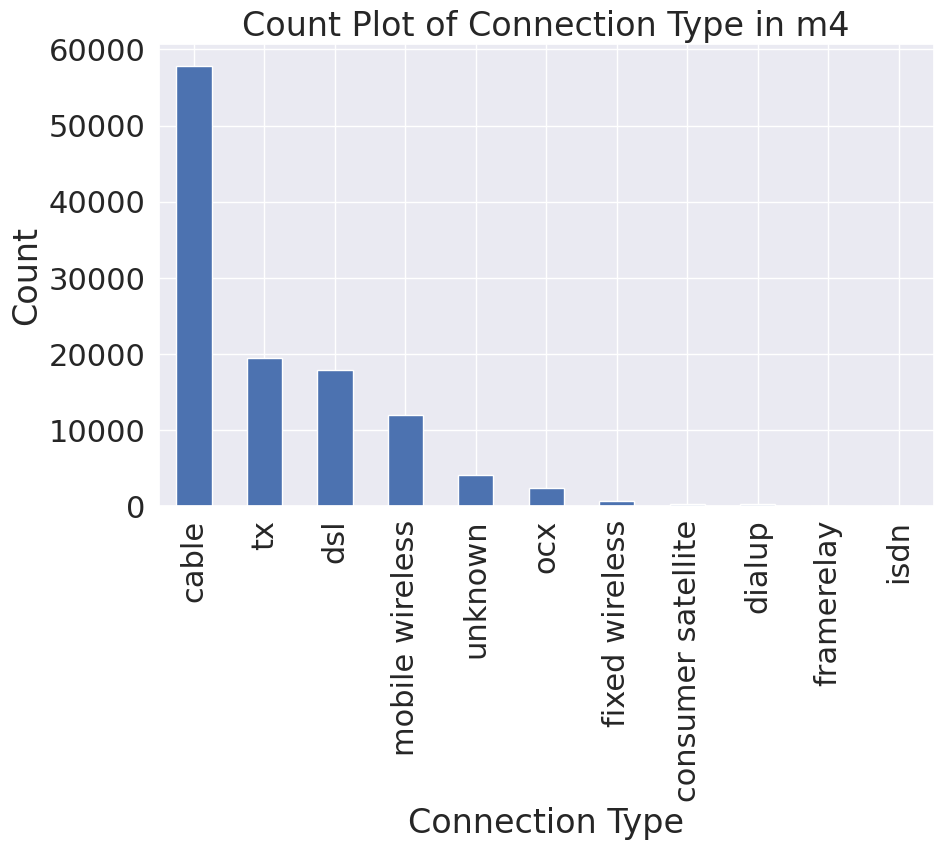

In [ ]:
plt.figure(figsize=(10, 6))
df4['ConnectionType'].value_counts().plot(kind='bar')
plt.xlabel('Connection Type')
plt.ylabel('Count')
plt.title('Count Plot of Connection Type in m4')
plt.show()

In [ ]:
df4['ConnectionType'].value_counts()

cable                 57827
tx                    19453
dsl                   17895
mobile wireless       11952
unknown                4108
ocx                    2363
fixed wireless          609
consumer satellite      253
dialup                  204
framerelay               30
isdn                     20
Name: ConnectionType, dtype: int64

In [ ]:
# Assuming df4 is your DataFrame
categories_to_count = ['isdn', 'consumer satellite', 'dialup', 'framerelay']
counts = df4[df4['ConnectionType'].isin(categories_to_count)]['ConnectionType'].value_counts()

print(counts)

consumer satellite    253
dialup                204
framerelay             30
isdn                   20
Name: ConnectionType, dtype: int64


In [ ]:
# Assuming df4 is your DataFrame
mode_value = df4['ConnectionType'].mode().iloc[0]  # Get the mode value

# Replace 'unknown' with the mode
df4['ConnectionType'] = df4['ConnectionType'].replace(['unknown'], mode_value)

In [ ]:
import pandas as pd

# Assuming df4 is your DataFrame
category_mapping = {'cable': 'broadband', 'tx': 'broadband', 'dsl': 'broadband',
                    'mobile wireless': 'wireless', 'unknown': 'other', 'ocx': 'other',
                    'fixed wireless': 'wireless', 'consumer satellite': 'satellite',
                    'dialup': 'dialup', 'framerelay': 'other', 'isdn': 'other'}

# Create a new column with the grouped categories using replace
df4['GroupedConnectionType'] = df4['ConnectionType'].replace(category_mapping)

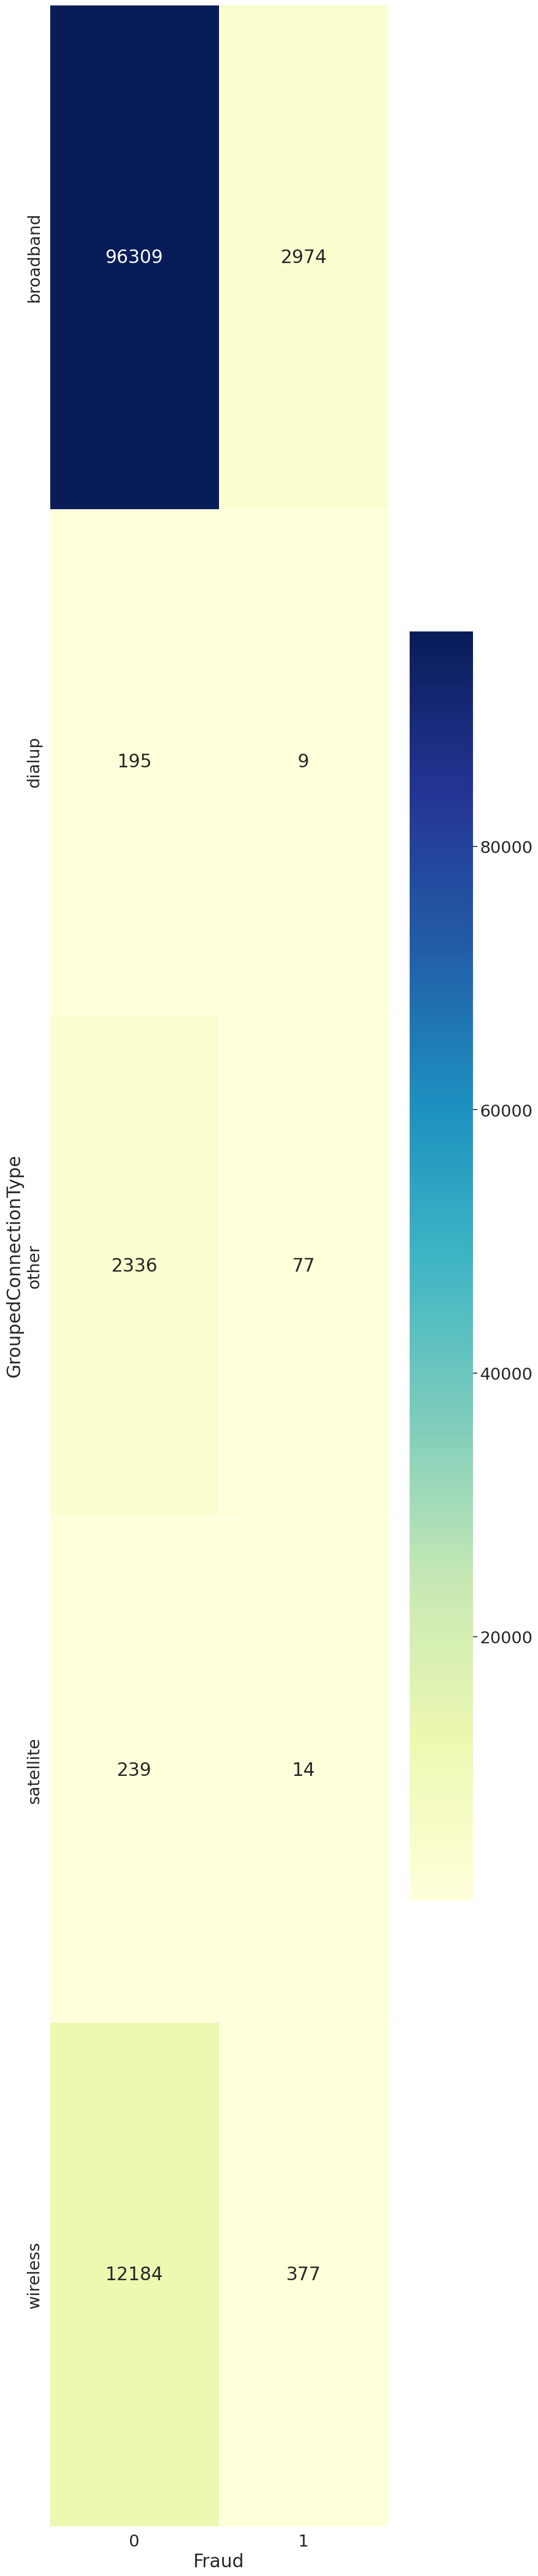

In [ ]:
# Step 1: Group by 'GroupedConnectionType' and 'Fraud' and calculate the count
grouped_data = df4.groupby(['GroupedConnectionType', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='GroupedConnectionType', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 60))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

In [ ]:
# Assuming df4 is your DataFrame
grouped_table = df4.groupby(['GroupedConnectionType', 'Fraud']).size().unstack(fill_value=0)

# Calculate the ratio using div
crosstab_ratio = grouped_table.div(grouped_table.sum(axis=1), axis=0)

# Display the result
print(crosstab_ratio)

Fraud                     0     1
GroupedConnectionType            
broadband             0.970 0.030
dialup                0.956 0.044
other                 0.968 0.032
satellite             0.945 0.055
wireless              0.970 0.030


# Connection Speed

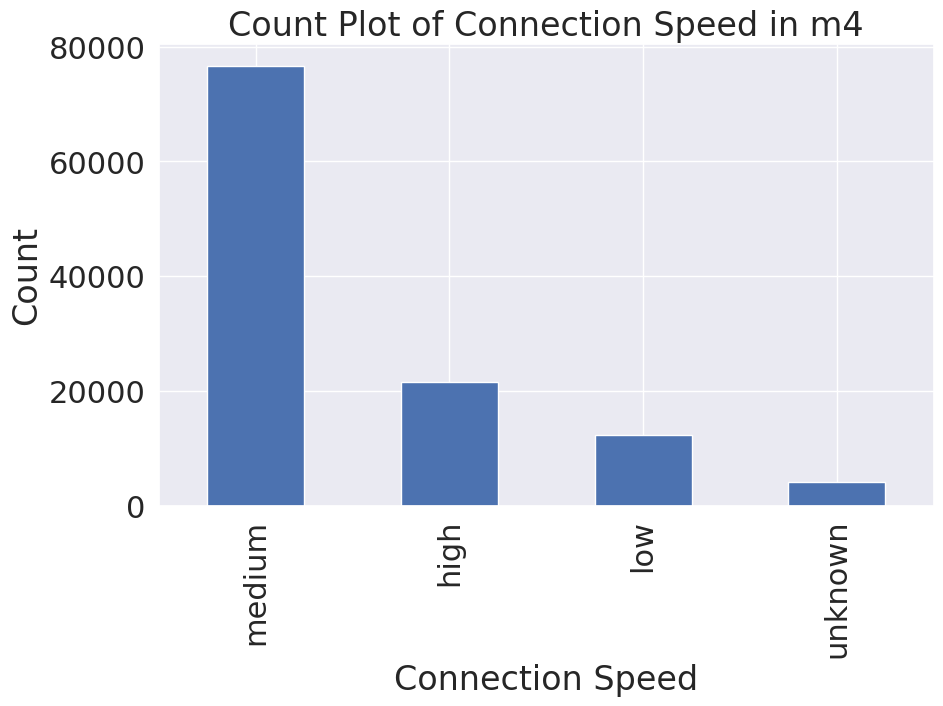

In [ ]:
# Assuming m4 is your DataFrame
plt.figure(figsize=(10, 6))
df4['ConnectionSpeed'].value_counts().plot(kind='bar')
plt.xlabel('Connection Speed')
plt.ylabel('Count')
plt.title('Count Plot of Connection Speed in m4')
plt.show()

In [ ]:
df4['ConnectionSpeed'] = df4['ConnectionSpeed'].replace(['unknown'], df4['ConnectionSpeed'].mode())

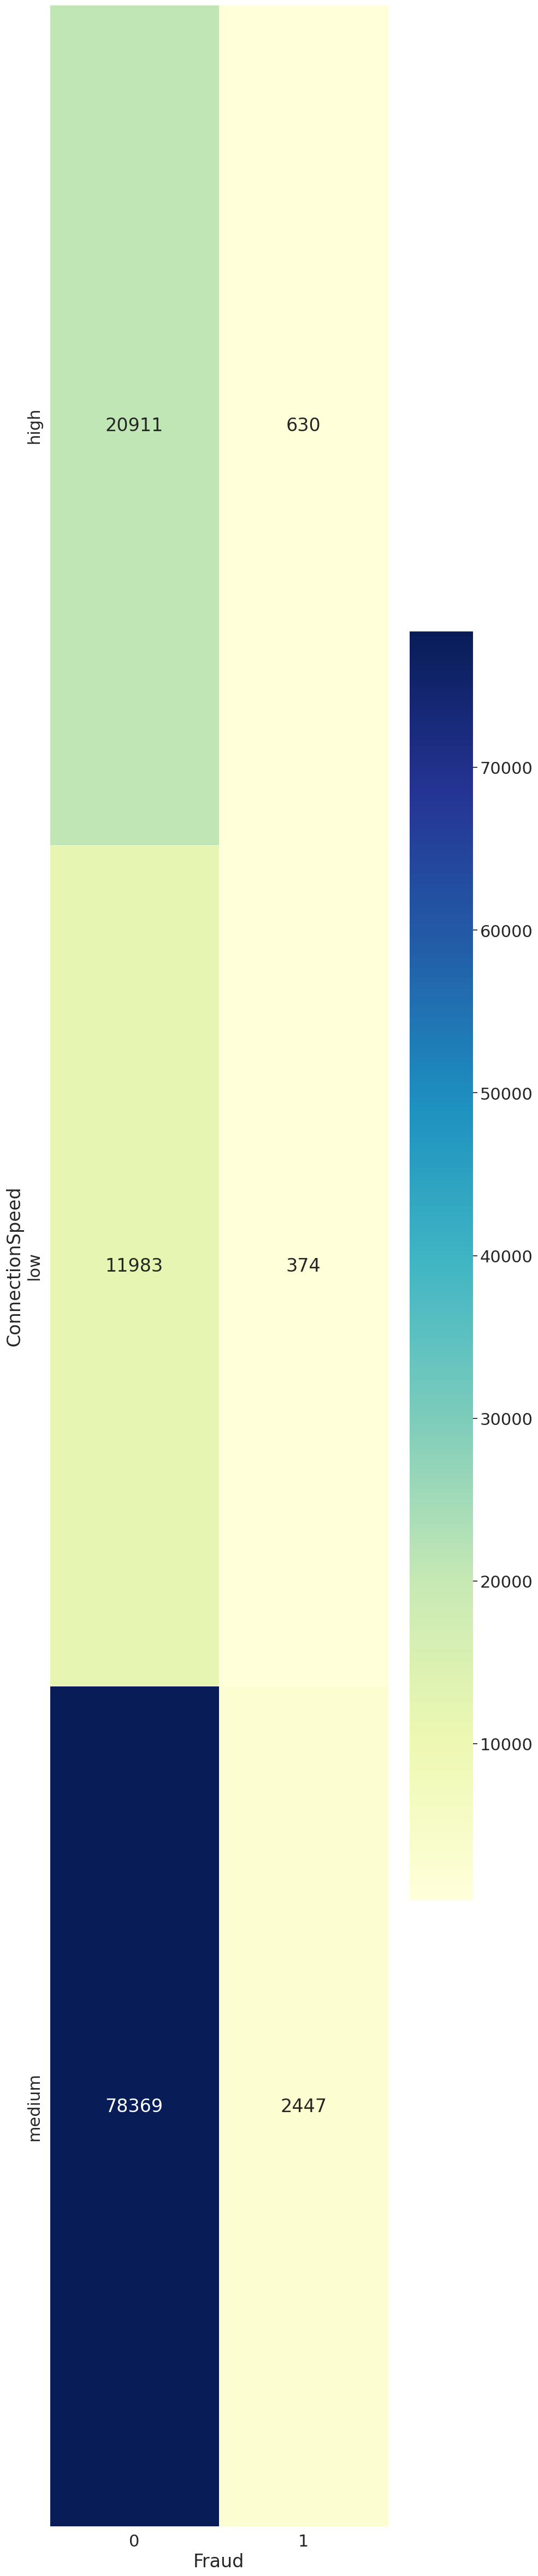

In [ ]:
# Step 1: Group by 'connectionSpeed' and 'Fraud' and calculate the count
grouped_data = df4.groupby(['ConnectionSpeed', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='ConnectionSpeed', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 60))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

In [ ]:
import pandas as pd

# Assuming df4 is your DataFrame
grouped_table = df4.groupby(['ConnectionSpeed', 'Fraud']).size().unstack(fill_value=0)

# Calculate the ratio using div
crosstab_ratio = grouped_table.div(grouped_table.sum(axis=1), axis=0)

# Display the result
print(crosstab_ratio)

Fraud               0     1
ConnectionSpeed            
high            0.971 0.029
low             0.970 0.030
medium          0.970 0.030


# V6CF

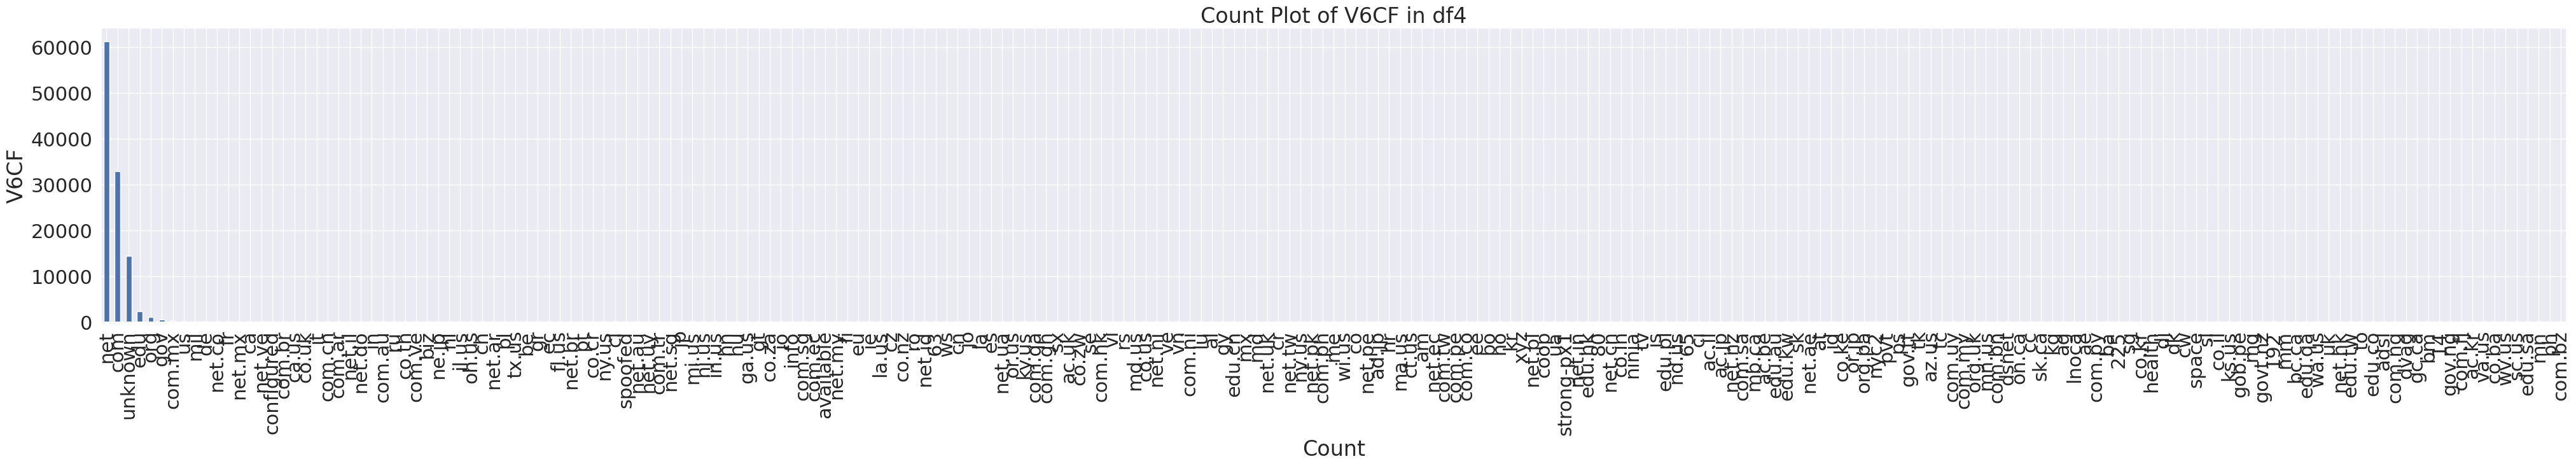

In [ ]:
# Assuming df4 is your DataFrame
plt.figure(figsize=(50, 6))
df4['V6CF'].value_counts().plot(kind='bar')
plt.ylabel('V6CF')
plt.xlabel('Count')
plt.title('Count Plot of V6CF in df4')
plt.show()

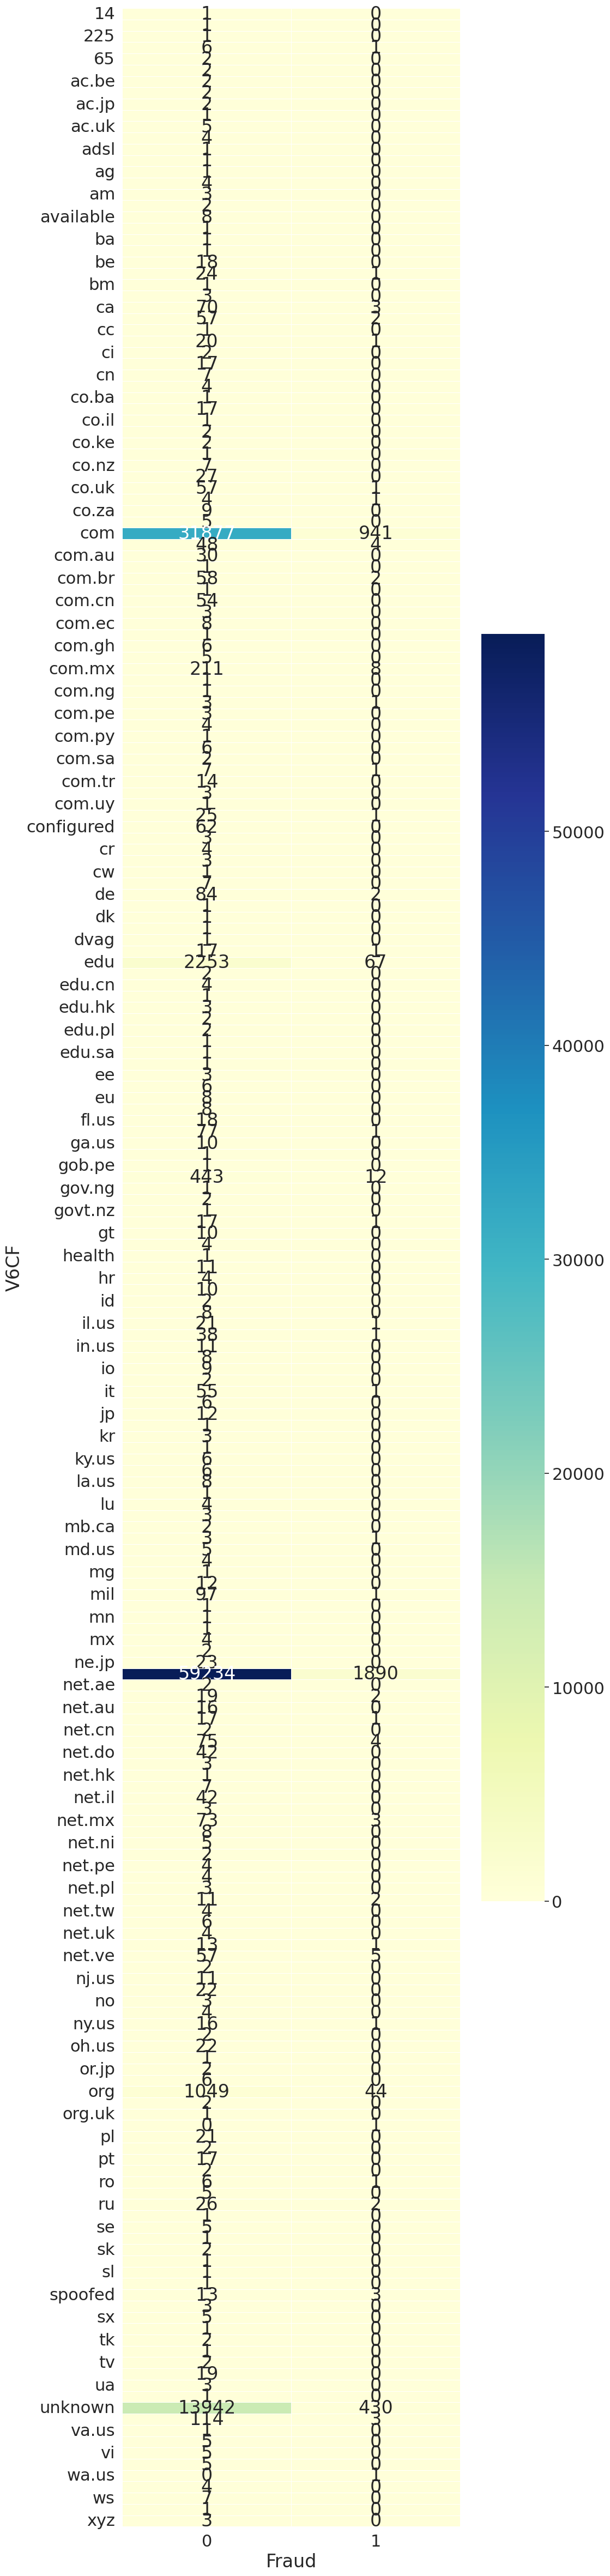

In [ ]:
# Step 1: Group by 'V6CF' and 'Fraud' and calculate the count
grouped_data = df4.groupby(['V6CF', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='V6CF', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 60))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

In [ ]:
# Assuming df4 is your DataFrame
grouped_table = df4.groupby(['V6CF', 'Fraud']).size().unstack(fill_value=0)

# Calculate the ratio using div
crosstab_ratio = grouped_table.div(grouped_table.sum(axis=1), axis=0)

# Display the result
print(crosstab_ratio)

Fraud     0     1
V6CF             
14    1.000 0.000
192   1.000 0.000
225   1.000 0.000
63    0.857 0.143
65    1.000 0.000
...     ...   ...
wa.us 0.000 1.000
wi.us 1.000 0.000
ws    1.000 0.000
wv.us 1.000 0.000
xyz   1.000 0.000

[223 rows x 2 columns]


In [ ]:
# Step 1: Group by 'V6CF' and calculate the sum of 'Fraud'
fraud_sum_by_V6CF = df4.groupby('V6CF')['Fraud'].sum()

# Step 2: Identify categories with sum more than 1
categories_to_keep = fraud_sum_by_V6CF[fraud_sum_by_V6CF > 1].index

# Step 3: Filter and keep rows
df5 = df4[df4['V6CF'].isin(categories_to_keep)]

# Now, 'm5' contains rows where 'V6CF' categories have sum of 'Fraud' more than 1

# channel

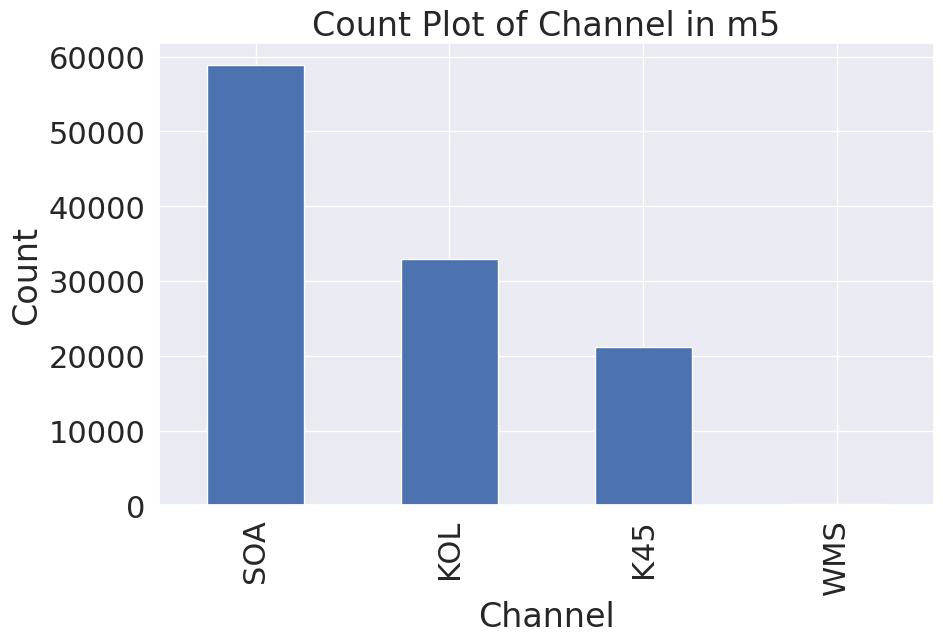

In [ ]:
# Assuming m5 is your DataFrame
plt.figure(figsize=(10, 6))
df5['channel'].value_counts().plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Count Plot of Channel in m5')
plt.show()

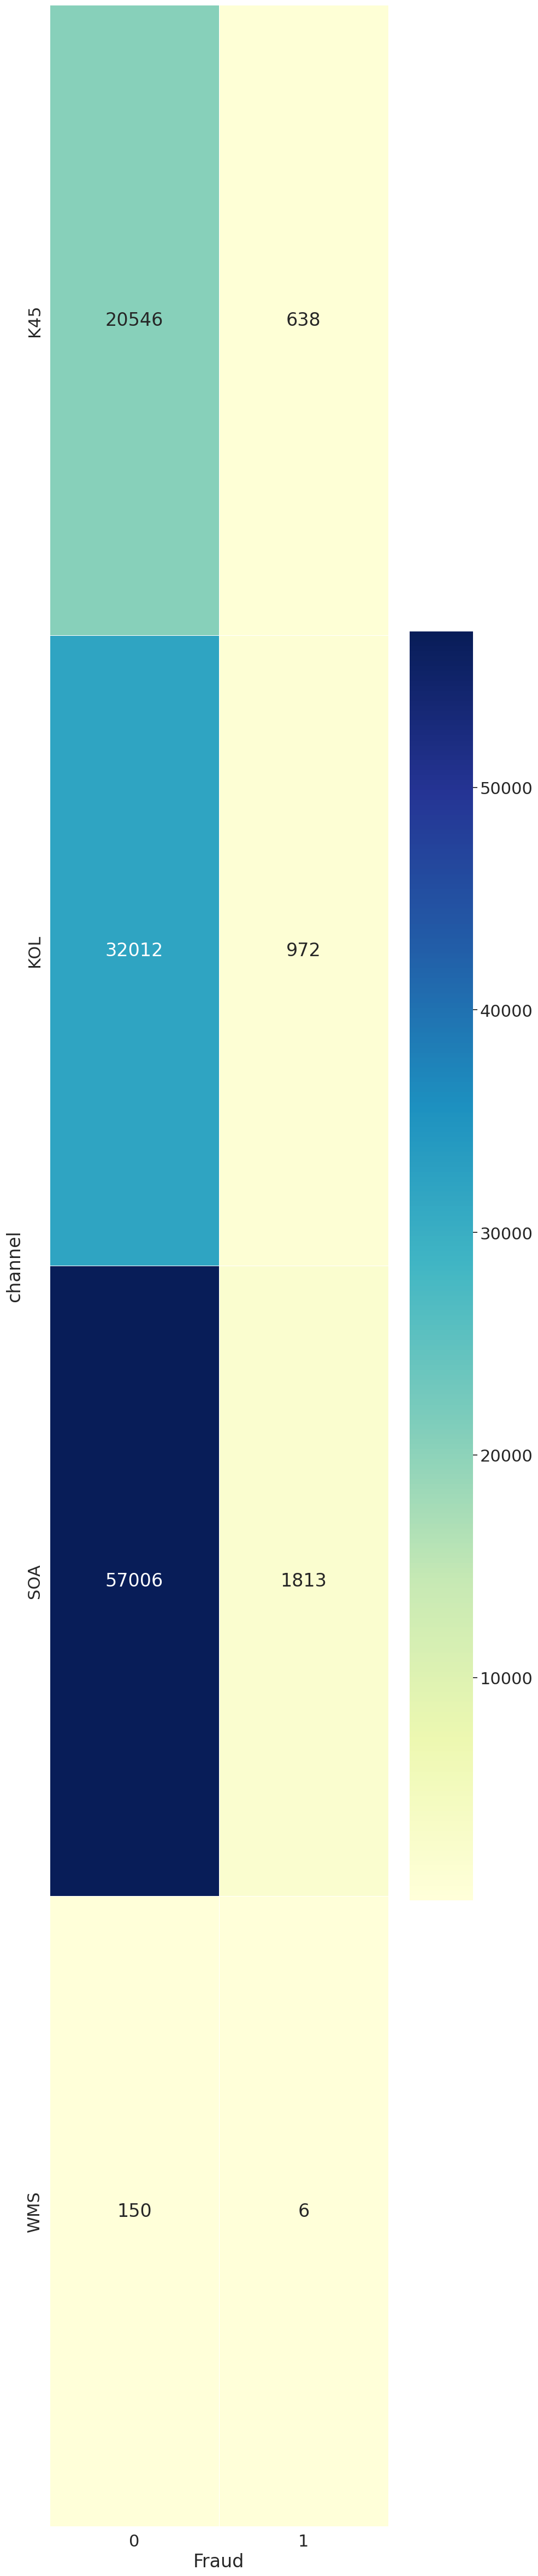

In [ ]:
# Step 1: Group by 'Channel' and 'Fraud' and calculate the count
grouped_data = df5.groupby(['channel', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='channel', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 60))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

In [ ]:
# Assuming df5 is your DataFrame
grouped_table = df5.groupby(['channel', 'Fraud']).size().unstack(fill_value=0)

# Calculate the ratio using div
crosstab_ratio = grouped_table.div(grouped_table.sum(axis=1), axis=0)

# Display the result
print(crosstab_ratio)

Fraud       0     1
channel            
K45     0.970 0.030
KOL     0.971 0.029
SOA     0.969 0.031
WMS     0.962 0.038


# TransactionDateTime

In [ ]:
# Assuming df5 is your DataFrame
df5['TransactionDateTime'] = pd.to_datetime(df5['TransactionDateTime'], format='%d/%m/%Y %H:%M:%S:%f')

# Extracting Date and Time into separate columns
df5['TransactionDate'] = df5['TransactionDateTime'].dt.date
df5['TransactionTime'] = df5['TransactionDateTime'].dt.time

# AddressUpdateDate

In [ ]:
# Assuming df is your DataFrame and TransactionDateTime is the column
df5['AddressUpdateDate'] = pd.to_datetime(df5['AddressUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f')

# Extracting Date and Time into separate columns
df5['AddressUpdateDate1'] = df5['AddressUpdateDate'].dt.date
df5['AddressUpdateTime'] = df5['AddressUpdateDate'].dt.time

# EmailUpdateDate

In [ ]:
# Assuming m5 is your DataFrame
df5['EmailUpdateDate'] = df5['EmailUpdateDate'].replace('0', np.nan)

In [ ]:
df5['EmailUpdateDate'] = pd.to_datetime(df5['EmailUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f')

# Extracting Date and Time into separate columns
df5['EmailUpdateDate1'] = df5['EmailUpdateDate'].dt.date
df5['EmailUpdateTime'] = df5['EmailUpdateDate'].dt.time

Separating Date and Time.

Now finding the distance between the days TransactionDate -AddressUpdateDate; and TransactionDate - EmailUpdateDate

In [ ]:
df5['AddressUpdateDate1'] = pd.to_datetime(df5['AddressUpdateDate1'])
df5['EmailUpdateDate1'] = pd.to_datetime(df5['EmailUpdateDate1'])
df5['TransactionDate'] = pd.to_datetime(df5['TransactionDate'])

df5['TADateDiff'] = df5['TransactionDate'] - df5['AddressUpdateDate1']
df5['TEDateDiff'] = df5['TransactionDate'] - df5['EmailUpdateDate1']

df5['TADateDiff'] = df5['TADateDiff'].dt.days.astype(str)
df5['TADateDiff'] = df5['TADateDiff'].str.replace('days', '').str.strip()

df5['TEDateDiff'] = df5['TEDateDiff'].dt.days.astype(str)
df5['TEDateDiff'] = df5['TEDateDiff'].str.replace('days', '').str.strip()

df5['TADateDiff'] = df5['TADateDiff'].astype(int)
df5['TEDateDiff'] = df5['TEDateDiff'].astype(float)

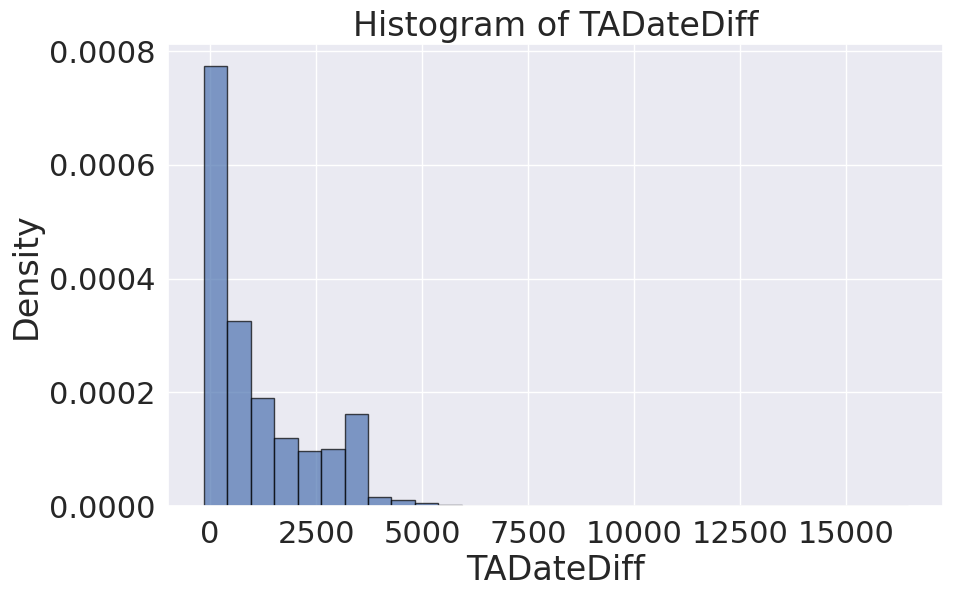

In [ ]:
 # Assuming m5 is your DataFrame
plt.figure(figsize=(10, 6))
df5['TADateDiff'].plot(kind='hist', bins=30, density=True, alpha=0.7, edgecolor='black')
plt.xlabel('TADateDiff')
plt.ylabel('Density')
plt.title('Histogram of TADateDiff')
plt.show()

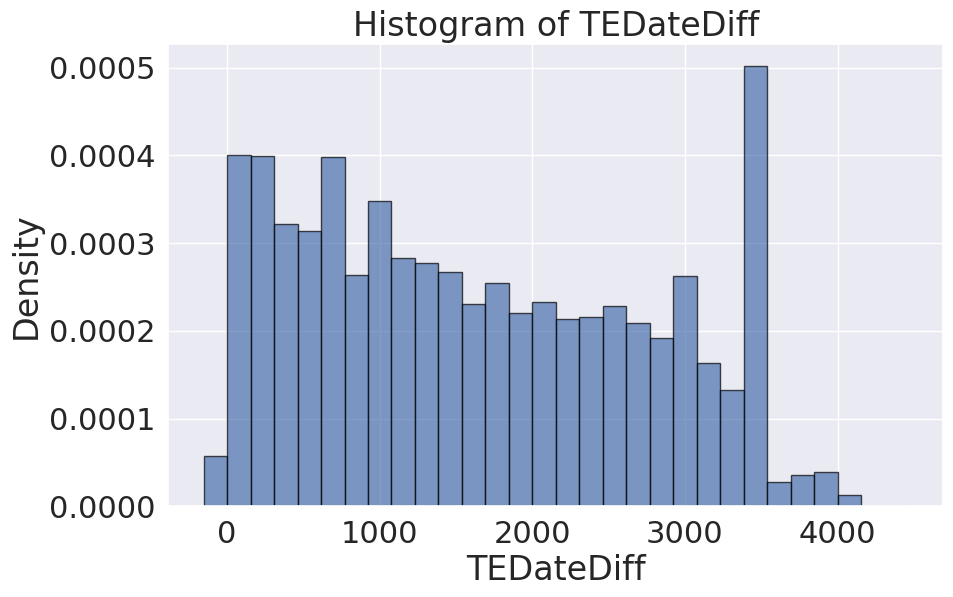

In [ ]:
# Assuming m5 is your DataFrame
plt.figure(figsize=(10, 6))
df5['TEDateDiff'].plot(kind='hist', bins=30, density=True, alpha=0.7, edgecolor='black')
plt.xlabel('TEDateDiff')
plt.ylabel('Density')
plt.title('Histogram of TEDateDiff')
plt.show()

In [ ]:
df5['TADateDiff'].describe()

count   113143.000
mean      1128.750
std       1223.971
min       -153.000
25%        217.000
50%        573.000
75%       1790.000
max      16465.000
Name: TADateDiff, dtype: float64

In [ ]:
df5['TEDateDiff'].describe()

count   113120.000
mean      1638.003
std       1104.656
min       -152.000
25%        663.000
50%       1487.000
75%       2580.000
max       4462.000
Name: TEDateDiff, dtype: float64

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113143 entries, 404 to 138731
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   V1CF                   113143 non-null  float64       
 1   V2CF                   113143 non-null  float64       
 2   V3CF                   113143 non-null  float64       
 3   V4CF                   113143 non-null  float64       
 4   V5CF                   113143 non-null  float64       
 5   AreaCode               113133 non-null  float64       
 6   ConnectionType         113143 non-null  object        
 7   ConnectionSpeed        113143 non-null  object        
 8   V6CF                   113143 non-null  object        
 9   channel                113143 non-null  object        
 10  TransactionDateTime    113143 non-null  datetime64[ns]
 11  AddressUpdateDate      113143 non-null  datetime64[ns]
 12  EmailUpdateDate        113120 non-null  da

In [ ]:
# Convert columns to string
df5['TransactionTime'] = df5['TransactionTime'].astype(str)
df5['AddressUpdateTime'] = df5['AddressUpdateTime'].astype(str)
df5['EmailUpdateTime'] = df5['EmailUpdateTime'].astype(str)

# Extract first two digits from the time columns
df5['TransactionHour'] = df5['TransactionTime'].str[:2]
df5['AddressUpdateHour'] = df5['AddressUpdateTime'].str[:2]
df5['EmailUpdateHour'] = df5['EmailUpdateTime'].str[:2]

In [ ]:
df5['TransactionHour'] = pd.to_numeric(df5['TransactionHour'], errors='coerce')
df5['AddressUpdateHour'] = pd.to_numeric(df5['AddressUpdateHour'], errors='coerce')
df5['EmailUpdateHour'] = pd.to_numeric(df5['EmailUpdateHour'], errors='coerce')

In [ ]:
# Assuming df5 is your DataFrame
def categorize_time_periods(hour_column):
    bins = [0, 6, 12, 18, 24]
    labels = ['Night', 'Morning', 'Afternoon', 'Evening']
    return pd.cut(hour_column, bins=bins, labels=labels, include_lowest=True)

df5['TransactionHour'] = categorize_time_periods(df5['TransactionHour'])
df5['AddressUpdateHour'] = categorize_time_periods(df5['AddressUpdateHour'])
df5['EmailUpdateHour'] = categorize_time_periods(df5['EmailUpdateHour'])

segregating time into quadrants such as Morning, Afternoon, Evening, Night.

In [ ]:
df5 = df5.drop(['TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate', 'TransactionDate', 'TransactionTime', 'AddressUpdateDate1','AddressUpdateTime','EmailUpdateDate1', 'EmailUpdateTime'], axis=1)

# WebSessOS

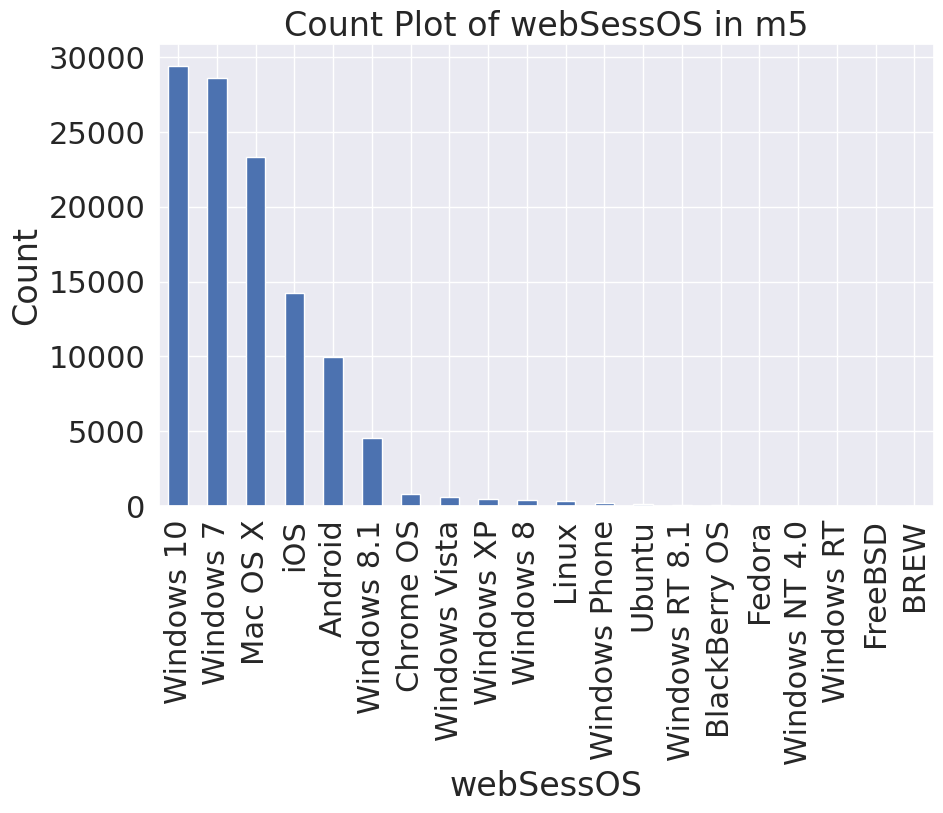

In [ ]:
# Assuming df5 is your DataFrame
plt.figure(figsize=(10, 6))
df5['webSessOS'].value_counts().plot(kind='bar')
plt.xlabel('webSessOS')
plt.ylabel('Count')
plt.title('Count Plot of webSessOS in m5')
plt.show()

In [ ]:
webSessOS_mapping = {
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Mac OS X': 'Mac',
    'iOS': 'iOS',
    'Android': 'Android',
    'Windows 8.1': 'Windows',
    'Chrome OS': 'Other',
    'Windows Vista': 'Windows',
    'Windows XP': 'Windows',
    'Windows 8': 'Windows',
    'Linux': 'Linux',
    'Windows Phone': 'Other',
    'Ubuntu': 'Linux',
    'Windows RT 8.1': 'Windows',
    'BlackBerry OS': 'Other',
    'Fedora': 'Linux',
    'Windows RT': 'Windows',
    'Windows NT 4.0': 'Windows',
    'FreeBSD': 'Other',
    'BREW': 'Other'
}

# Create a new column 'OS_Category' based on the mapping
df5['Grouped_webSessOS'] = df5['webSessOS'].map(webSessOS_mapping)

In [ ]:
df5['Grouped_webSessOS'].value_counts()

Windows    64062
Mac        23342
iOS        14229
Android     9932
Other       1099
Linux        479
Name: Grouped_webSessOS, dtype: int64

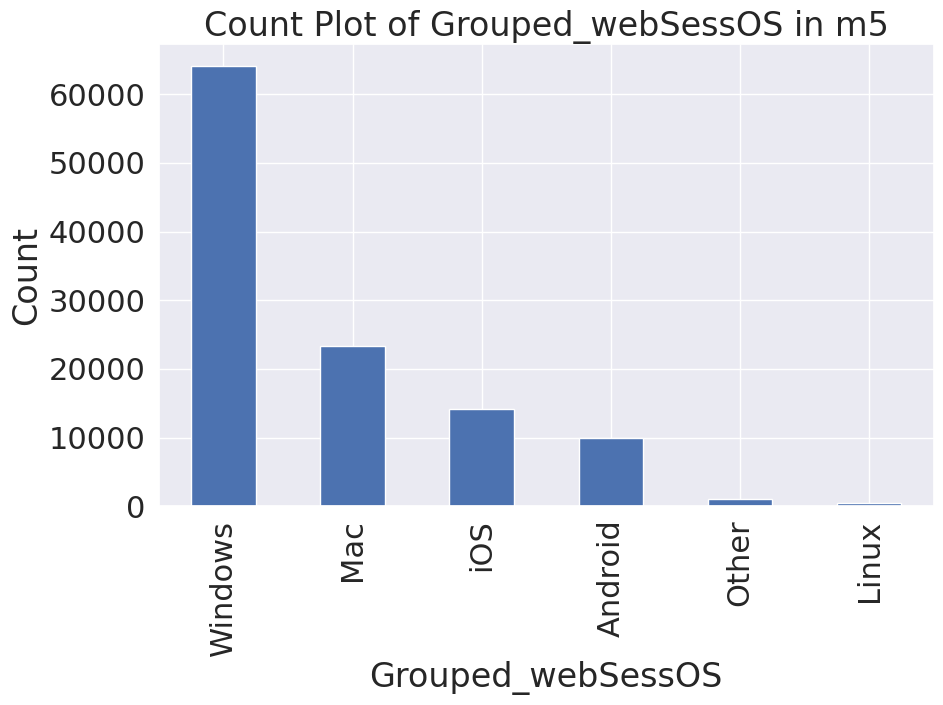

In [ ]:
 # Assuming df5 is your DataFrame
plt.figure(figsize=(10, 6))
df5['Grouped_webSessOS'].value_counts().plot(kind='bar')
plt.xlabel('Grouped_webSessOS')
plt.ylabel('Count')
plt.title('Count Plot of Grouped_webSessOS in m5')
plt.show()

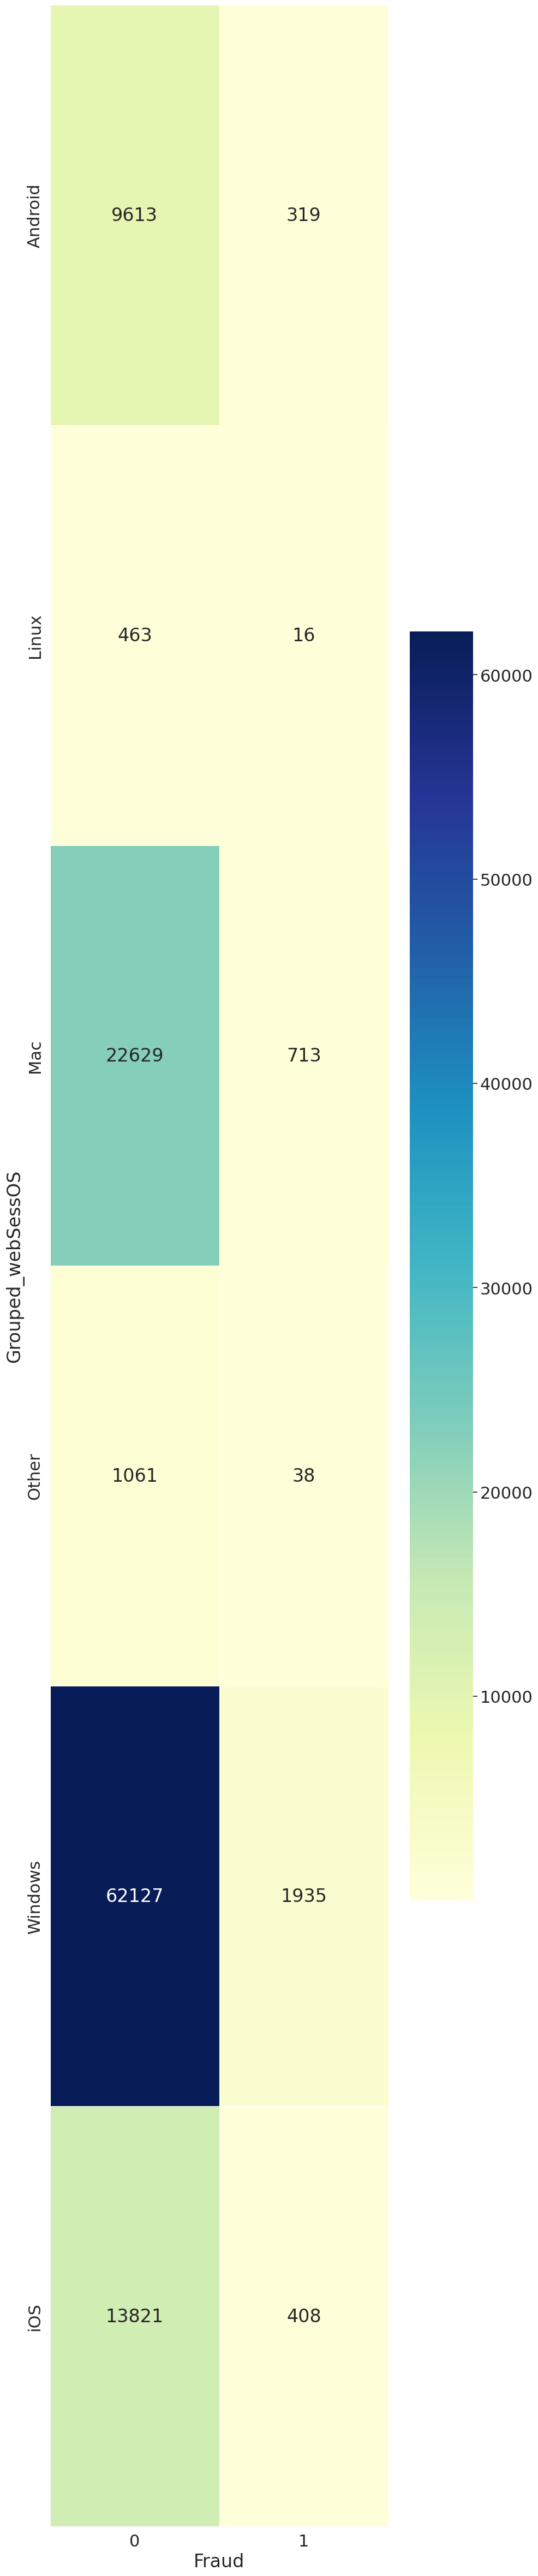

In [ ]:
# Step 1: Group by 'Grouped_webSessOS' and 'Fraud' and calculate the count
grouped_data = df5.groupby(['Grouped_webSessOS', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='Grouped_webSessOS', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 60))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

In [ ]:
# Assuming df5 is your DataFrame
grouped_table = df5.groupby(['Grouped_webSessOS', 'Fraud']).size().unstack(fill_value=0)

# Calculate the ratio using div
crosstab_ratio = grouped_table.div(grouped_table.sum(axis=1), axis=0)

# Display the result
print(crosstab_ratio)

Fraud                 0     1
Grouped_webSessOS            
Android           0.968 0.032
Linux             0.967 0.033
Mac               0.969 0.031
Other             0.965 0.035
Windows           0.970 0.030
iOS               0.971 0.029


In [ ]:
df5 = df5.drop(['webSessOS'], axis=1)

# WebSessWebBrowser

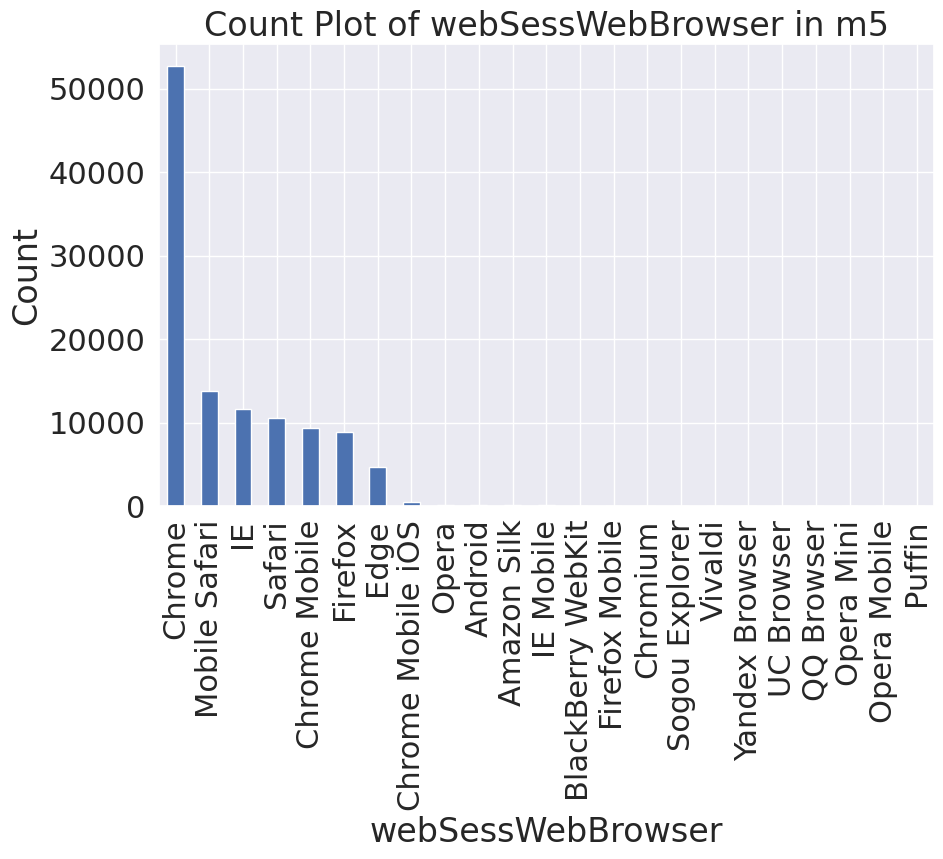

In [ ]:
# Assuming df5 is your DataFrame
plt.figure(figsize=(10, 6))
df5['webSessWebBrowser'].value_counts().plot(kind='bar')
plt.xlabel('webSessWebBrowser')
plt.ylabel('Count')
plt.title('Count Plot of webSessWebBrowser in m5')
plt.show()

In [ ]:
df5['webSessWebBrowser'].value_counts()

Chrome               52709
Mobile Safari        13773
IE                   11672
Safari               10626
Chrome Mobile         9344
Firefox               8935
Edge                  4742
Chrome Mobile iOS      483
Opera                  202
Android                192
Amazon Silk            152
IE Mobile              124
BlackBerry WebKit       58
Firefox Mobile          32
Chromium                27
Sogou Explorer          24
Vivaldi                 19
Yandex Browser          15
UC Browser               5
QQ Browser               4
Opera Mini               3
Opera Mobile             1
Puffin                   1
Name: webSessWebBrowser, dtype: int64

In [ ]:
webSessWebBrowser_mapping = {
    'Chrome': 'Chrome',
    'Mobile Safari': 'Safari',
    'IE': 'IE',
    'Safari': 'Safari',
    'Chrome Mobile': 'Chrome',
    'Firefox': 'Firefox',
    'Edge': 'Edge',
    'Chrome Mobile iOS': 'Chrome',
    'Opera': 'Opera',
    'Android': 'Android',
    'Amazon Silk': 'Other',
    'IE Mobile': 'IE',
    'BlackBerry WebKit': 'Other',
    'Firefox Mobile': 'Firefox',
    'Chromium': 'Chrome',
    'Sogou Explorer': 'Other',
    'Vivaldi': 'Other',
    'Yandex Browser': 'Other',
    'UC Browser': 'Other',
    'QQ Browser': 'Other',
    'Opera Mini': 'Opera',
    'Opera Mobile': 'Opera',
    'Puffin': 'Other'
}

# Create a new column 'Browser_Category' based on the mapping
df5['webSessWebBrowser_Category'] = df5['webSessWebBrowser'].map(webSessWebBrowser_mapping)

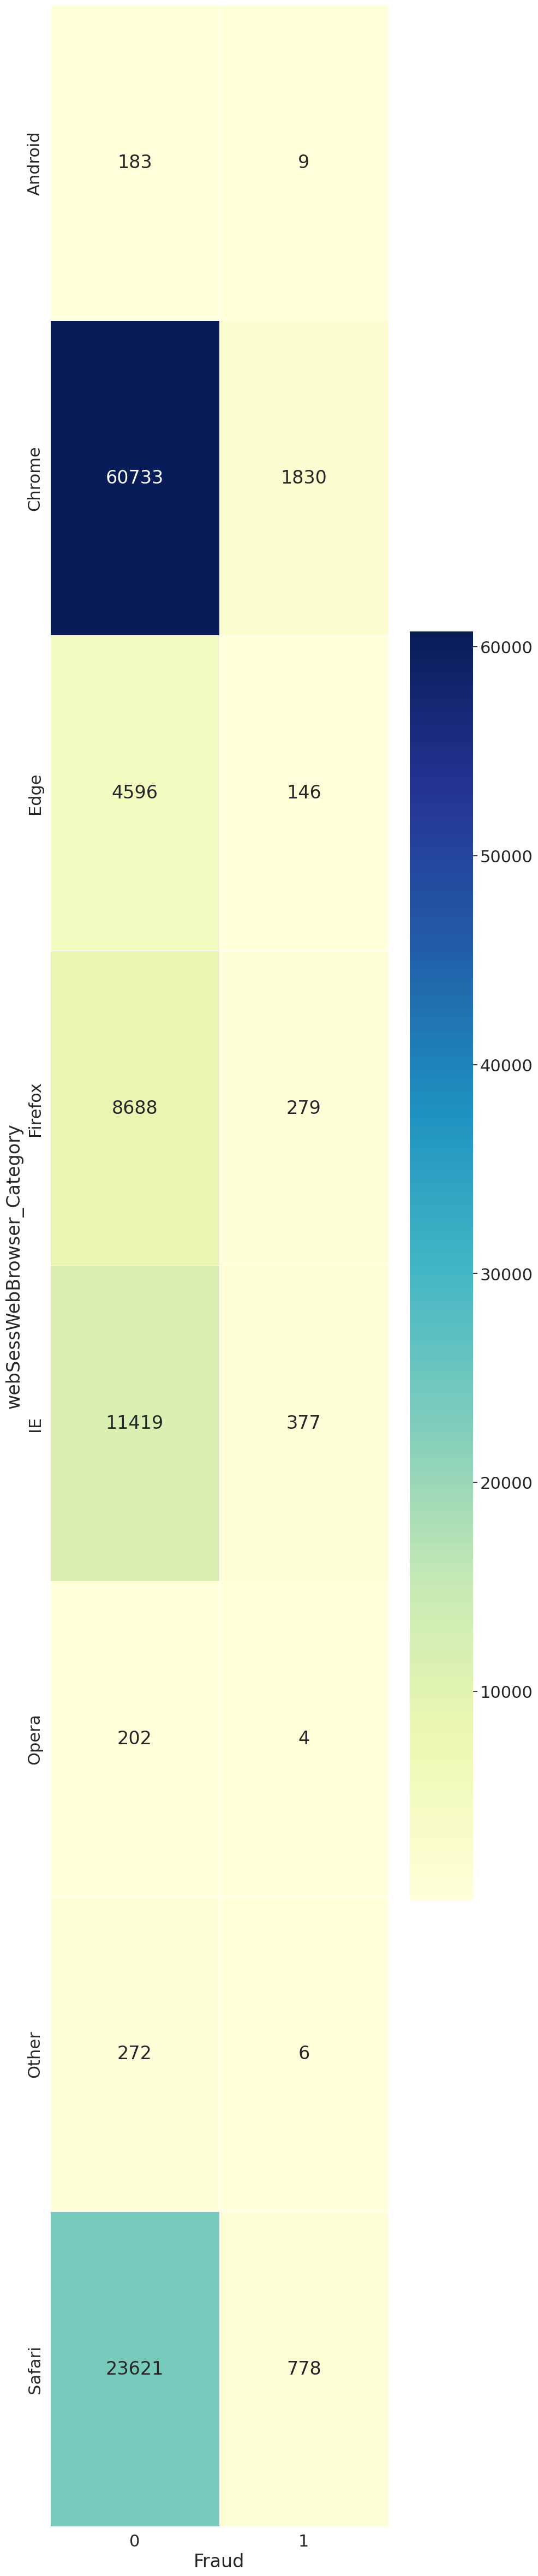

In [ ]:
# Step 1: Group by 'webSessWebBrowser_Category' and 'Fraud' and calculate the count
grouped_data = df5.groupby(['webSessWebBrowser_Category', 'Fraud']).size().reset_index(name='Count')

# Step 2: Create a pivot table
pivot_table = grouped_data.pivot_table(index='webSessWebBrowser_Category', columns='Fraud', values='Count', fill_value=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 60))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.8})

# Display the plot
plt.show()

In [ ]:
# Assuming df5 is your DataFrame
grouped_table = df5.groupby(['webSessWebBrowser_Category', 'Fraud']).size().unstack(fill_value=0)

# Calculate the ratio using div
crosstab_ratio = grouped_table.div(grouped_table.sum(axis=1), axis=0)

# Display the result
print(crosstab_ratio)

Fraud                          0     1
webSessWebBrowser_Category            
Android                    0.953 0.047
Chrome                     0.971 0.029
Edge                       0.969 0.031
Firefox                    0.969 0.031
IE                         0.968 0.032
Opera                      0.981 0.019
Other                      0.978 0.022
Safari                     0.968 0.032


In [ ]:
df5 = df5.drop(['webSessWebBrowser'], axis=1)

# IsOldDevice

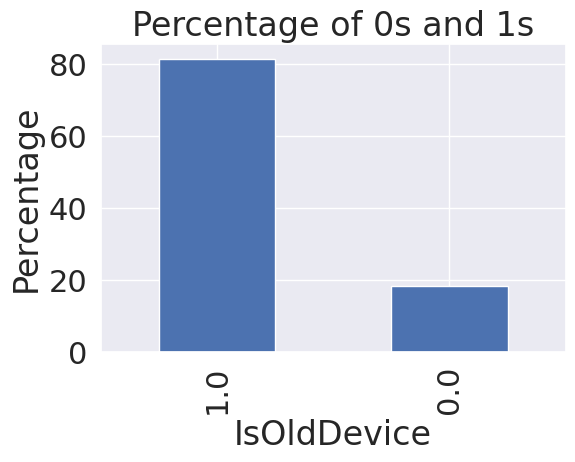

In [ ]:
# Assuming df5 is your DataFrame
IsOldDevice_percentage = df5['IsOldDevice'].value_counts(normalize=True) * 100

# Plot the percentage of 0s and 1s
plt.figure(figsize=(6, 4))
IsOldDevice_percentage.plot(kind='bar')
plt.xlabel('IsOldDevice')
plt.ylabel('Percentage')
plt.title('Percentage of 0s and 1s')
plt.show()

In [ ]:
# Step 1: Replace 'nan' with NaN
df5['IsOldDevice'].replace('nan', np.nan, inplace=True)

# Step 15: Fill missing values (including 0) with the mode
mode_value = df5['IsOldDevice'].mode().iloc[0]
df5['IsOldDevice'].fillna(mode_value, inplace=True)

# MainentityUse

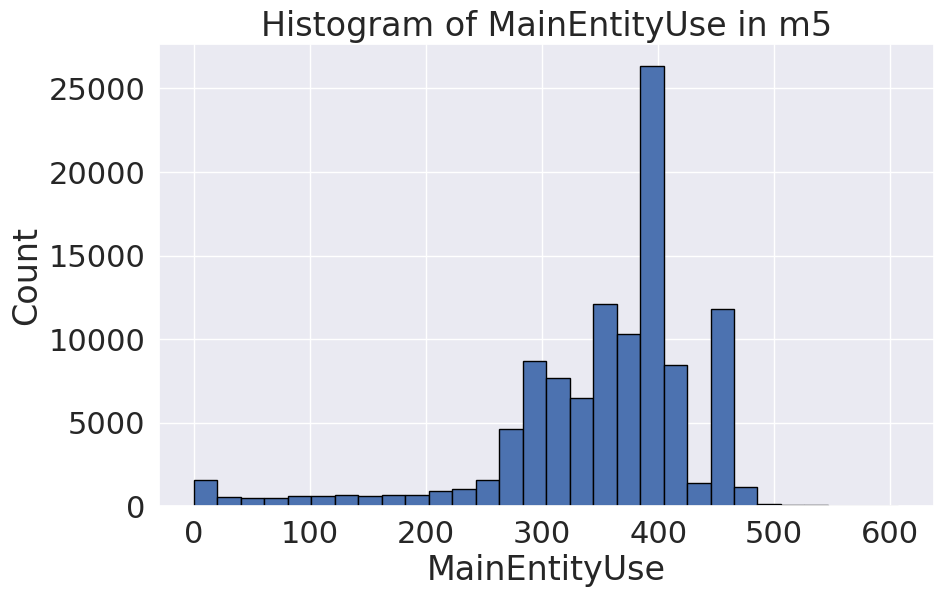

In [ ]:
# Assuming df5 is your DataFrame
plt.figure(figsize=(10, 6))
df5['MainEntityUse'].hist(bins=30, edgecolor='black')
plt.xlabel('MainEntityUse')
plt.ylabel('Count')
plt.title('Histogram of MainEntityUse in m5')
plt.show()

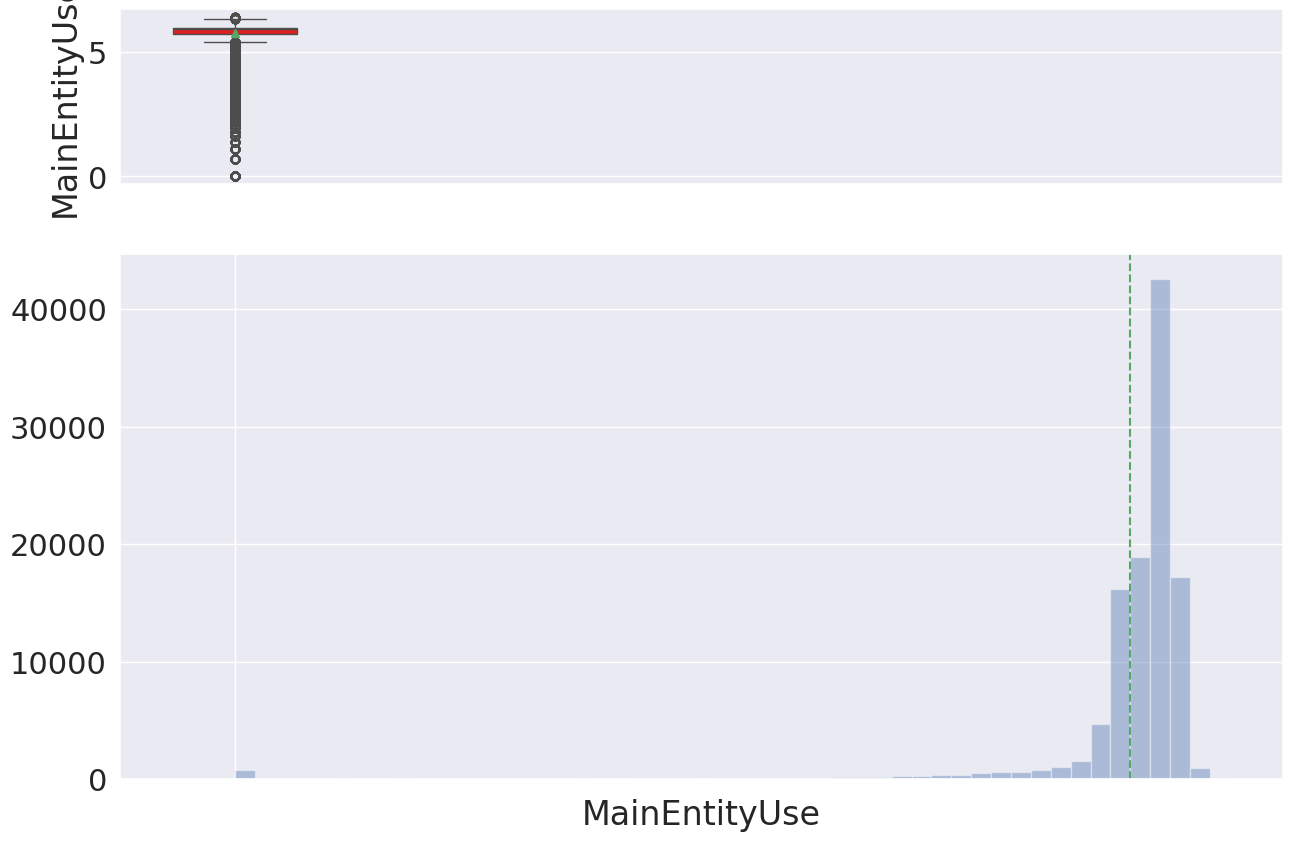

In [ ]:
histogram_boxplot(np.log1p(df5.MainEntityUse))

# Fraud

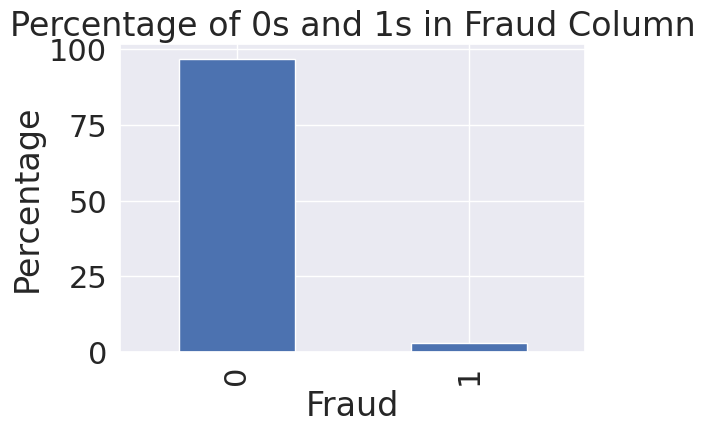

In [ ]:
# Assuming df5 is your DataFrame
Fraud_percentage = df5['Fraud'].value_counts(normalize=True) * 100

# Plot the percentage of 0s and 1s
plt.figure(figsize=(6, 4))
Fraud_percentage.plot(kind='bar')
plt.xlabel('Fraud')
plt.ylabel('Percentage')
plt.title('Percentage of 0s and 1s in Fraud Column')
plt.show()

Selecting features for the model

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113143 entries, 404 to 138731
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   V1CF                        113143 non-null  float64 
 1   V2CF                        113143 non-null  float64 
 2   V3CF                        113143 non-null  float64 
 3   V4CF                        113143 non-null  float64 
 4   V5CF                        113143 non-null  float64 
 5   AreaCode                    113133 non-null  float64 
 6   ConnectionType              113143 non-null  object  
 7   ConnectionSpeed             113143 non-null  object  
 8   V6CF                        113143 non-null  object  
 9   channel                     113143 non-null  object  
 10  IsOldDevice                 113143 non-null  float64 
 11  MainEntityUse               109790 non-null  float64 
 12  Fraud                       113143 non-null  int64   
 1

In [ ]:
df5.select_dtypes(include='object').nunique()

ConnectionType                 10
ConnectionSpeed                 3
V6CF                           20
channel                         4
Region                         21
City                          135
Country                        52
GroupedConnectionOrg1         182
GroupedConnectionType           5
Grouped_webSessOS               6
webSessWebBrowser_Category      8
dtype: int64

In [ ]:
df6 = df5.copy()
df6 = df6.drop(['V6CF', 'Region', 'Country', 'GroupedConnectionOrg1'], axis=1)

In [ ]:
df6[['TransactionHour', 'AddressUpdateHour', 'EmailUpdateHour']].nunique()

TransactionHour      4
AddressUpdateHour    4
EmailUpdateHour      4
dtype: int64

In [ ]:
df6[['TransactionHour', 'AddressUpdateHour', 'EmailUpdateHour']] = df6[['TransactionHour', 'AddressUpdateHour', 'EmailUpdateHour']].astype(object)

# Dummies

In [ ]:
# Define the target variable
target_variable = "Fraud"

# Identify object columns
object_columns = df6.select_dtypes(include=['object']).columns

# Iterate through each object column
for col in object_columns:
    # Calculate mean target value for each category in the column
    target_mean = df6.groupby(col)[target_variable].mean()

    # Replace categories with mean target values
    df6[col] = df6[col].map(target_mean)

# Print the DataFrame after target encoding
print(df6)

        V1CF  V2CF  V3CF  V4CF  V5CF  AreaCode  ConnectionType  \
404    1.000 0.949 0.778 0.921 0.341   619.000           0.030   
405    1.000 0.859 0.667 0.569 0.531   614.000           0.030   
406    1.000 0.980 0.808 0.759 0.739   630.000           0.031   
407    1.000 0.980 0.909 0.852 0.625     0.000           0.030   
408    1.000 0.808 0.232 0.599 0.341   732.000           0.030   
...      ...   ...   ...   ...   ...       ...             ...   
138727 1.000 0.960 0.667 0.617 0.841   614.000           0.030   
138728 1.000 0.889 0.727 0.911 0.665   212.000           0.030   
138729 1.000 0.636 0.667 0.569 0.665   516.000           0.030   
138730 1.000 0.949 0.667 0.707 0.242   732.000           0.030   
138731 1.000 0.949 0.899 0.855 0.857   719.000           0.030   

        ConnectionSpeed  channel  IsOldDevice  ...  Fraud  City  \
404               0.031    0.031        1.000  ...      0 0.030   
405               0.031    0.031        1.000  ...      0 0.015   
406   

In [ ]:
# Calculate correlation with the target variable 'Fraud'
correlation = df6.corr()['Fraud'].sort_values(ascending=False)

# Display correlation values
print(correlation)

Fraud                         1.000
City                          0.053
webSessWebBrowser_Category    0.009
ConnectionType                0.009
GroupedConnectionType         0.008
Grouped_webSessOS             0.005
EmailUpdateHour               0.005
AreaCode                      0.004
channel                       0.004
AddressUpdateHour             0.003
V5CF                          0.003
ConnectionSpeed               0.003
TransactionHour               0.002
MainEntityUse                 0.002
V1CF                          0.001
IsOldDevice                   0.001
V4CF                         -0.000
V2CF                         -0.001
V3CF                         -0.003
TADateDiff                   -0.003
TEDateDiff                   -0.003
Name: Fraud, dtype: float64


Strongest Positive Correlation: The 'City' column exhibits the strongest positive correlation with 'Fraud' (correlation coefficient = 0.53). This suggests that certain cities may have a higher likelihood of fraudulent transactions.

Positive Correlation: Other columns such as 'V5CF', 'Country', 'webSessWebBrowser', and 'webSessOS' also show positive correlations with 'Fraud', although to a lesser extent. These variables may have some influence on the occurrence of fraudulent transactions.

Weak Correlations: The remaining columns have relatively weak correlations with 'Fraud', with correlation coefficients close to zero. These variables may have minimal impact on fraudulent transactions, or their relationship with fraud may be nonlinear or indirect.

# Model Building

Defining the x variables and Y variable/Target Variable.

In [ ]:
x = df6.drop(['Fraud'], axis=1)

y = df6['Fraud']

Filling missing values.

In [ ]:
x.isna().sum()

V1CF                             0
V2CF                             0
V3CF                             0
V4CF                             0
V5CF                             0
AreaCode                        10
ConnectionType                   0
ConnectionSpeed                  0
channel                          0
IsOldDevice                      0
MainEntityUse                 3353
City                            40
GroupedConnectionType            0
TADateDiff                       0
TEDateDiff                      23
TransactionHour                  0
AddressUpdateHour                0
EmailUpdateHour                 23
Grouped_webSessOS                0
webSessWebBrowser_Category       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN

# Instantiate SimpleImputer to handle NaN values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in x
x_imputed = imputer.fit_transform(x)

# Instantiate SMOTEENN
smoteenn = SMOTEENN()

# Resample the data
x_resampled, y_resampled = smoteenn.fit_resample(x_imputed, y)

In [ ]:
x['IsOldDevice'] = x['IsOldDevice'].round().astype(int)

# LOGISTIC REGRESSION

Preparing functions to measure the metrics

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual: ground truth
    '''
    cm = confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=["Login Fraud", "No Login Fraud"],
                         columns=["Login Fraud", "No Login Fraud"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f" {v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# USING SK LEARN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
y_train = pd.DataFrame(y_train, columns=['Fraud'])

In [ ]:
y_test = pd.DataFrame(y_test, columns=['Fraud'])

Fitting the Linear Model.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

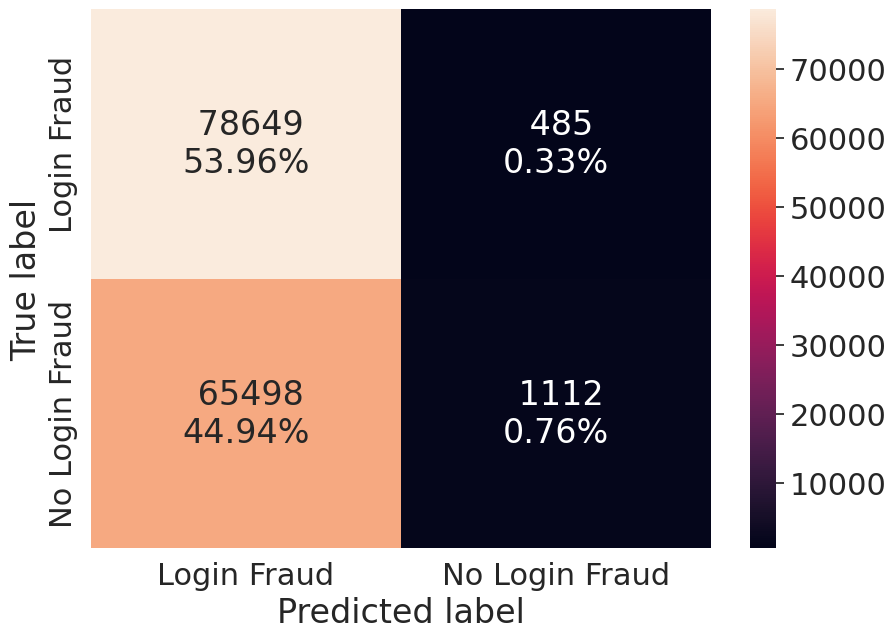

In [ ]:
pred_train = logreg.predict(x_train)
make_confusion_matrix(y_train, pred_train)

In [ ]:
pred_train = pd.DataFrame(pred_train, columns=['Predicted'])

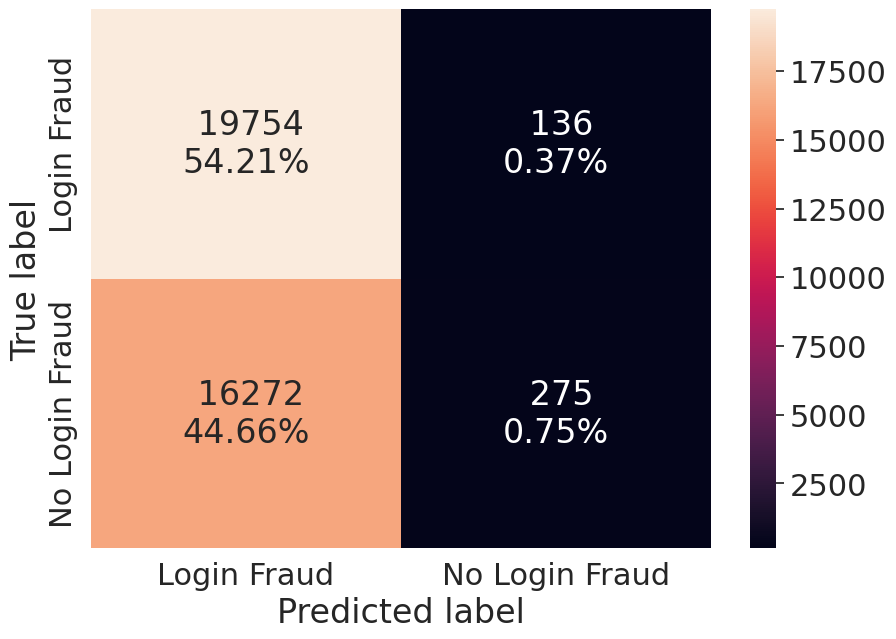

In [ ]:
pred_test = logreg.predict(x_test)
make_confusion_matrix(y_test, pred_test)

In [ ]:
pred_test = pd.DataFrame(pred_test, columns=['Predicted'])

In [ ]:
print('Accuracy on train data:', accuracy_score(y_train, pred_train) )
print('Accuracy on test data:', accuracy_score(y_test, pred_test))
print("\n")
print("Recall on train data:", recall_score(y_train, pred_train))
print("Recall on test data:", recall_score(y_test, pred_test))
print("\n")
print("Precision on train data:", precision_score(y_train, pred_train))
print("Precision on test data:", precision_score(y_test, pred_test))
print("\n")
print("f1 score on train data:", f1_score(y_train, pred_train))
print("f1 score on test data:", f1_score(y_test, pred_test))

Accuracy on train data: 0.5472678120540125
Accuracy on test data: 0.5496885034443011


Recall on train data: 0.9938711552556423
Recall on test data: 0.9931623931623932


Precision on train data: 0.5456166274705683
Precision on test data: 0.5483262088491645


f1 score on train data: 0.7044844836775184
f1 score on test data: 0.7065598397596395


# Plot ROC-AUC curve and see the results

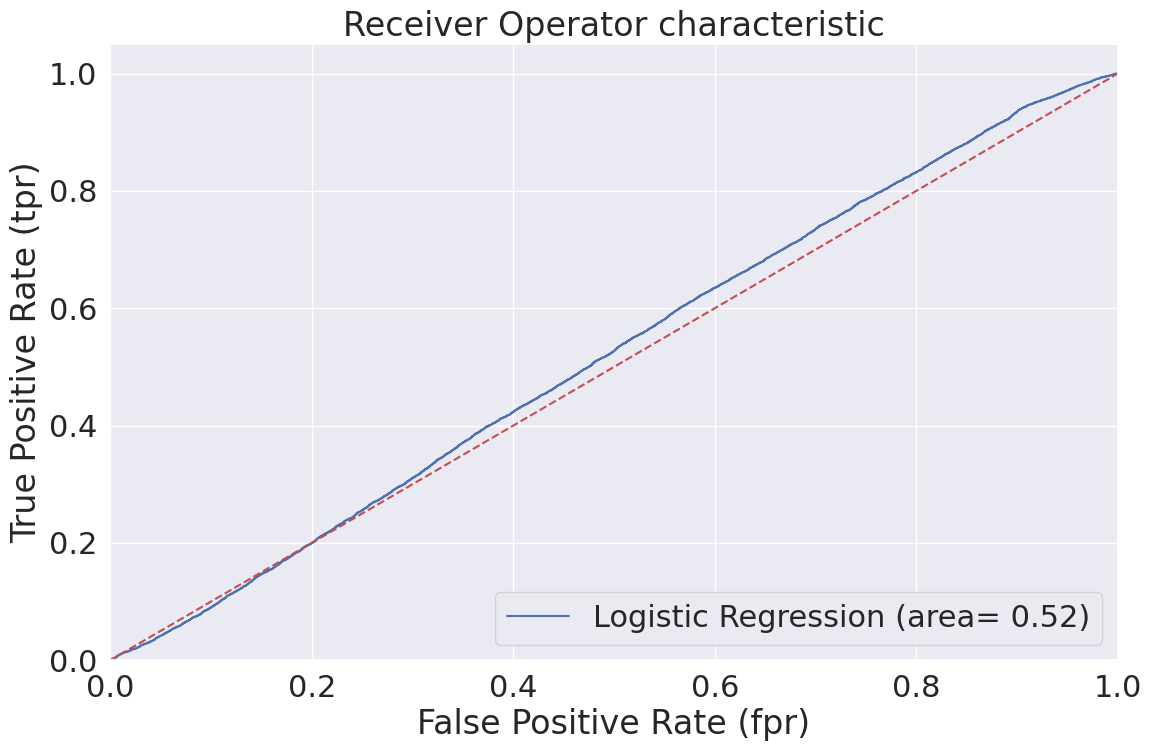

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, logreg.predict_proba(x_test) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Optimal Cutoff

In [ ]:
train_pred_prob = logreg.predict_proba(x_train)[:,1]
train_pred_prob

array([0.5422789 , 0.54159437, 0.51899304, ..., 0.52873859, 0.55566207,
       0.55440645])

In [ ]:
# Define column names for the DataFrame
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

# Create an empty DataFrame with the specified column names
cutoff_data = pd.DataFrame(columns=column_names)

# Generate a range of cutoff probabilities from 0 to 1 with a step size of 0.01
Cutoff_Prob = np.arange(0, 1.01, 0.01)

# Iterate over each cutoff probability
for cutoff in Cutoff_Prob:
    # Predict binary labels based on the probability cutoff
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")

    # Calculate True Positives (TP), False Negatives (FN), True Negatives (TN), False Positives (FP)
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Fraud == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Fraud == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Fraud == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Fraud == 0)).sum()

    # Calculate total Positive (P) and Negative (N) instances
    P = TP + FN
    N = TN + FP

    # Create a dictionary with the calculated values
    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    # Append the dictionary as a new row to the cutoff_data DataFrame
    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data to avoid conflicts
y_train.drop("pred_y", axis=1, inplace=True)

We have got the basic cutoff data. Let us now get all the features needed to decide the cutoff.

In [ ]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [ ]:
cutoff_data.head()

Cutoff_Prob        TP    FN    TN        FP         P         N    Sn  \
0        0.000 79134.000 0.000 0.000 66610.000 79134.000 66610.000 1.000   
1        0.010 79134.000 0.000 0.000 66610.000 79134.000 66610.000 1.000   
2        0.020 79134.000 0.000 0.000 66610.000 79134.000 66610.000 1.000   
3        0.030 79134.000 0.000 0.000 66610.000 79134.000 66610.000 1.000   
4        0.040 79134.000 0.000 0.000 66610.000 79134.000 66610.000 1.000   

     Sp  Dist    KS    Re    Pr   tpr   fpr    f1  
0 0.000 1.000 0.000 1.000 0.543 1.000 1.000 0.704  
1 0.000 1.000 0.000 1.000 0.543 1.000 1.000 0.704  
2 0.000 1.000 0.000 1.000 0.543 1.000 1.000 0.704  
3 0.000 1.000 0.000 1.000 0.543 1.000 1.000 0.704  
4 0.000 1.000 0.000 1.000 0.543 1.000 1.000 0.704

In [ ]:
df6['Fraud'].value_counts()

0    109714
1      3429
Name: Fraud, dtype: int64

# Let us now check for the results for accuracy using different cutoff methods.
Let us pick up max distance first

In [ ]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

In [ ]:
print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.54
The KS cutoff determined is: 0.54
The f1 cutoff determined is: 0.5


In [ ]:
# List of cutoff values
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (logreg.predict_proba(x_train)[:,1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(x_test)[:,1] > cutoff).astype(int)

    # Print results using the current cutoff value
    print("Using the cutoff value as:", cutoff)
    print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
    print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
    print("Recall on train data:", recall_score(y_train, y_pred_train))
    print("Recall on test data:", recall_score(y_test, y_pred_test))
    print("Precision on train data:", precision_score(y_train, y_pred_train))
    print("Precision on test data:", precision_score(y_test, y_pred_test))
    print("f1 score on train data:", f1_score(y_train, y_pred_train))
    print("f1 score on test data:", f1_score(y_test, y_pred_test))
    print("\n")

Using the cutoff value as: 0.54
Accuracy on train data: 0.5299086068723241
Accuracy on test data: 0.5280072453824409
Recall on train data: 0.6434276038112569
Recall on test data: 0.6357466063348416
Precision on train data: 0.5582208676394812
Precision on test data: 0.559562793167537
f1 score on train data: 0.5978033073667279
f1 score on test data: 0.5952268875917905


Using the cutoff value as: 0.54
Accuracy on train data: 0.5299086068723241
Accuracy on test data: 0.5280072453824409
Recall on train data: 0.6434276038112569
Recall on test data: 0.6357466063348416
Precision on train data: 0.5582208676394812
Precision on test data: 0.559562793167537
f1 score on train data: 0.5978033073667279
f1 score on test data: 0.5952268875917905


Using the cutoff value as: 0.5
Accuracy on train data: 0.5472678120540125
Accuracy on test data: 0.5496885034443011
Recall on train data: 0.9938711552556423
Recall on test data: 0.9931623931623932
Precision on train data: 0.5456166274705683
Precision on test

In [ ]:
default=0.5 # default cutoff

In [ ]:
# Define the cutoff values
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]

# Initialize an empty list to store results
results = []

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (logreg.predict_proba(x_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(x_test)[:, 1] > cutoff).astype(int)

    # Calculate evaluation metrics for train and test data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Store the results in a dictionary
    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_train,
        'Accuracy_test': accuracy_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test,
        'Precision_train': precision_train,
        'Precision_test': precision_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
    }

    # Append the dictionary to the results list
    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

Cutoff  Accuracy_train  Accuracy_test  Recall_train  Recall_test  \
0   0.500           0.547          0.550         0.994        0.993   
1   0.540           0.530          0.528         0.643        0.636   
2   0.540           0.530          0.528         0.643        0.636   
3   0.500           0.547          0.550         0.994        0.993   

   Precision_train  Precision_test  F1_train  F1_test  
0            0.546           0.548     0.704    0.707  
1            0.558           0.560     0.598    0.595  
2            0.558           0.560     0.598    0.595  
3            0.546           0.548     0.704    0.707

# Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Metrics:
Accuracy: 0.9568295962894859
Precision: 0.9536381197681906
Recall: 0.9679738562091503
F1 Score: 0.960752513785274


To deal with Overfitting, we will use Decision Tree Pre-Pruning and we will use RandomizedSearchCV over GridSearch CV to reduce processing time

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their ranges for tuning
parameters = {
    "max_depth": np.arange(1, 10),  # Maximum depth of the tree
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "splitter": ["best", "random"],  # Strategy to choose the split at each node
    "min_samples_split": np.arange(2, 20),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    "max_features": ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(dt_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_dt_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_dt_classifier.predict(x_train)
y_test_pred = best_dt_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'gini'}
Training Metrics:
Accuracy: 0.8628828631024261
Precision: 0.9209365214916027
Recall: 0.8176637096570374
F1 Score: 0.8662329143071341

Test Metrics:
Accuracy: 0.864615637950435
Precision: 0.9207787092781184
Recall: 0.8227752639517345
F1 Score: 0.8690226482223933


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 7, 15],  # Number of trees in the forest
    'max_depth': np.arange(1, 10),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_rf_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_rf_classifier.predict(x_train)
y_test_pred = best_rf_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 9}
Training Metrics:
Accuracy: 0.9542554067405863
Precision: 0.9734239236950415
Recall: 0.9414537366997751
F1 Score: 0.9571719481720831

Test Metrics:
Accuracy: 0.9540302439827648
Precision: 0.9744230869406678
Recall: 0.9404725992961287
F1 Score: 0.9571468774784455


# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
# Initialize base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=1)

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_samples': [0.5, 1.0],  # Maximum number of samples to draw from X to train each base estimator
    'max_features': [0.5, 1.0]  # Maximum number of features to consider when looking for the best split
}


# Initialize Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(bagging_classifier, parameters, n_iter=5, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_bagging_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_bagging_classifier.predict(x_train)
y_test_pred = best_bagging_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 10, 'max_samples': 0.5, 'max_features': 0.5}
Training Metrics:
Accuracy: 0.9859754089362169
Precision: 1.0
Recall: 0.9741703945206864
F1 Score: 0.9869162228594839

Test Metrics:
Accuracy: 0.9819688777890606
Precision: 0.9998440667394355
Recall: 0.9671191553544495
F1 Score: 0.9832093843440927


# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier with hyperparameter tuning parameters
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameter_grid = {
    'n_estimators': np.arange(10, 50, 5),  # Number of boosting stages to be used in the boosting process
    'learning_rate': [1, 0.1, 0.5, 0.01]  # Weight applied to each classifier at each boosting iteration
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(ab_tuned, parameter_grid, scoring='recall', cv=5, n_iter=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_ab_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_ab_tuned.predict(x_train)
y_test_pred = best_ab_tuned.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 45, 'learning_rate': 0.1}
Training Metrics:
Accuracy: 0.8489886376111538
Precision: 0.8294595997462368
Recall: 0.908711805292289
F1 Score: 0.8672789439724053

Test Metrics:
Accuracy: 0.8458160660866701
Precision: 0.8256960292104062
Recall: 0.9095525389643037
F1 Score: 0.8655980861244019


# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier with hyperparameter tuning parameters
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from

parameter_grid = {
    'n_estimators': [20, 30, 40],  # Number of boosting stages to be used in the boosting process
    'learning_rate': [0.1, 0.3, 0.5],  # Weight applied to each classifier at each boosting iteration
    'max_depth': [3, 4, 5],  # Maximum depth of each tree in the ensemble
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(gb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best estimator
best_gb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_gb_tuned.predict(x_train)
y_test_pred = best_gb_tuned.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')  # Changed to 'weighted'
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Changed to 'weighted'
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 40, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.3}
Training Metrics:
Accuracy: 0.9812685256339884
Precision: 0.9819936468061291
Recall: 0.9656531958450224
F1 Score: 0.9824507270413082

Test Metrics:
Accuracy: 0.9816120975931059
Precision: 0.9822874653157694
Recall: 0.9668174962292609
F1 Score: 0.9828775875287503


# XGBClassifier

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier with hyperparameter tuning parameters
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from (with reduced values for faster execution)
parameter_grid = {
    'n_estimators': [50, 75, 100],  # Number of trees in the ensemble
    'subsample': [0.7, 0.8, 0.09],  # Subsample ratio of the training instances
    'gamma': [0, 1, 3],  # Minimum loss reduction required to make a further partition on a leaf node
    'colsample_bytree': [0.7, 0.8, 0.09],  # Subsample ratio of columns when constructing each tree
    'colsample_bylevel': [0.7, 0.8, 0.09]  # Subsample ratio of columns for each level when constructing each tree
}


# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(xgb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best estimator
best_xgb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_xgb_tuned.predict(x_train)
y_test_pred = best_xgb_tuned.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')  # Changed to 'weighted'
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Changed to 'weighted'
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}
Training Metrics:
Accuracy: 0.9816184542759908
Precision: 0.9823271309400565
Recall: 0.9661713043698031
F1 Score: 0.9827820017610047

Test Metrics:
Accuracy: 0.9819688777890606
Precision: 0.982625821347804
Recall: 0.9673705379587733
F1 Score: 0.9832136743401722


# Summary

In [ ]:
# Define the performance metrics
performance_metrics = {
    "Algorithm": ["Logistic Regression", "Decision Tree Classifier",
                  "Decision Tree Classifier with Pre-Pruning", "Random Forest Classifier",
                  "Bagging Classifier", "Adaboost Classifier",
                  "Gradient Boost Classifier", "XG Boost Classifier"],
    "Train Accuracy": [0.5299, 1.0, 0.8628, 0.9542, 0.9859, 0.8489, 0.9812, 0.9816],
    "Test Accuracy": [0.5280, 0.9568, 0.8646, 0.9540, 0.9819, 0.8458, 0.9816, 0.9819],
    "Train Recall": [0.6434, 1.0, 0.8176, 0.9414, 0.9741, 0.9087, 0.9656, 0.9661],
    "Test Recall": [0.6357, 0.9679, 0.8227, 0.9404, 0.9671, 0.9095, 0.9668, 0.9673],
    "Train Precision": [0.5582, 1.0, 0.9209, 0.9734, 1.0, 0.8294, 0.9819, 0.9823],
    "Test Precision": [0.5595, 0.9536, 0.9207, 0.9744, 0.9998, 0.8256, 0.9822, 0.9826],
    "Train F1 Score": [0.5978, 1.0, 0.8662, 0.9571, 0.9869, 0.8672, 0.9824, 0.9827],
    "Test F1 Score": [0.5952, 0.9607, 0.8690, 0.9571, 0.9832, 0.8655, 0.9828, 0.9832]
}

# Create a DataFrame from the performance metrics dictionary
results = pd.DataFrame(performance_metrics)



# Print the DataFrame
results

Algorithm  Train Accuracy  Test Accuracy  \
0                        Logistic Regression           0.530          0.528   
1                   Decision Tree Classifier           1.000          0.957   
2  Decision Tree Classifier with Pre-Pruning           0.863          0.865   
3                   Random Forest Classifier           0.954          0.954   
4                         Bagging Classifier           0.986          0.982   
5                        Adaboost Classifier           0.849          0.846   
6                  Gradient Boost Classifier           0.981          0.982   
7                        XG Boost Classifier           0.982          0.982   

   Train Recall  Test Recall  Train Precision  Test Precision  Train F1 Score  \
0         0.643        0.636            0.558           0.559           0.598   
1         1.000        0.968            1.000           0.954           1.000   
2         0.818        0.823            0.921           0.921           0.866   
3         0.941        0.940            0.973           0.974           0.957   
4         0.974        0.967            1.000           1.000           0.987   
5         0.909        0.909            0.829           0.826           0.867   
6         0.966        0.967            0.982           0.982           0.982   
7         0.966        0.967            0.982           0.983           0.983   

   Test F1 Score  
0          0.595  
1          0.961  
2          0.869  
3          0.957  
4          0.983  
5          0.866  
6          0.983  
7          0.983

Considering these metrics, the XG Boost Classifier demonstrates consistent and strong performance across both training and testing datasets. It achieves high accuracy, recall, precision, and F1 scores on both datasets, indicating its effectiveness in fraud detection tasks. Additionally, XG Boost is known for its efficiency, scalability, and ability to handle complex datasets, making it a suitable choice for this task. Therefore, the XG Boost Classifier is chosen as the preferred algorithm for fraud detection based on its strong performance and suitability for the task.

At the conclusion of the project:

Identified 'ConnectionOrg' as a significant predictor of fraudulent transactions, suggesting certain organizations may pose higher risks.
Positive correlations observed in 'V6CF', 'Country', 'webSessWebBrowser', and 'webSessOS', though less pronounced, provide additional insights into potential fraud factors.

In [ ]:
df6

V1CF  V2CF  V3CF  V4CF  V5CF  AreaCode  ConnectionType  \
404    1.000 0.949 0.778 0.921 0.341   619.000           0.030   
405    1.000 0.859 0.667 0.569 0.531   614.000           0.030   
406    1.000 0.980 0.808 0.759 0.739   630.000           0.031   
407    1.000 0.980 0.909 0.852 0.625     0.000           0.030   
408    1.000 0.808 0.232 0.599 0.341   732.000           0.030   
...      ...   ...   ...   ...   ...       ...             ...   
138727 1.000 0.960 0.667 0.617 0.841   614.000           0.030   
138728 1.000 0.889 0.727 0.911 0.665   212.000           0.030   
138729 1.000 0.636 0.667 0.569 0.665   516.000           0.030   
138730 1.000 0.949 0.667 0.707 0.242   732.000           0.030   
138731 1.000 0.949 0.899 0.855 0.857   719.000           0.030   

        ConnectionSpeed  channel  IsOldDevice  ...  Fraud  City  \
404               0.031    0.031        1.000  ...      0 0.030   
405               0.031    0.031        1.000  ...      0 0.015   
406               0.031    0.030        1.000  ...      0 0.033   
407               0.031    0.031        1.000  ...      0 0.033   
408               0.031    0.031        1.000  ...      0 0.031   
...                 ...      ...          ...  ...    ...   ...   
138727            0.029    0.031        1.000  ...      0 0.030   
138728            0.031    0.029        1.000  ...      0 0.034   
138729            0.029    0.031        1.000  ...      0 0.031   
138730            0.031    0.029        1.000  ...      0 0.031   
138731            0.031    0.030        1.000  ...      0 0.031   

        GroupedConnectionType  TADateDiff  TEDateDiff  TransactionHour  \
404                     0.030        2830    2029.000            0.030   
405                     0.030        1728    3430.000            0.030   
406                     0.030          29     224.000            0.031   
407                     0.030        3102    1327.000            0.030   
408                     0.030        3101     781.000            0.030   
...                       ...         ...         ...              ...   
138727                  0.030         269     810.000            0.030   
138728                  0.030         268    3308.000            0.030   
138729                  0.030        4591    1902.000            0.030   
138730                  0.030        4593    2713.000            0.031   
138731                  0.030         572    3429.000            0.030   

        AddressUpdateHour  EmailUpdateHour  Grouped_webSessOS  \
404                 0.030            0.031              0.030   
405                 0.030            0.029              0.030   
406                 0.030            0.030              0.030   
407                 0.030            0.030              0.030   
408                 0.030            0.030              0.031   
...                   ...              ...                ...   
138727              0.030            0.031              0.032   
138728              0.031            0.029              0.030   
138729              0.030            0.031              0.030   
138730              0.030            0.030              0.029   
138731              0.030            0.029              0.030   

        webSessWebBrowser_Category  
404                          0.032  
405                          0.029  
406                          0.029  
407                          0.029  
408                          0.032  
...                            ...  
138727                       0.031  
138728                       0.032  
138729                       0.032  
138730                       0.031  
138731                       0.029  

[113143 rows x 21 columns]